<a href="https://colab.research.google.com/github/JielingChen/Data_Science_Practice_Projects/blob/main/Language_Gutenberg_Bernoulli_Entropy_TFIDF_PCA_KMeans_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

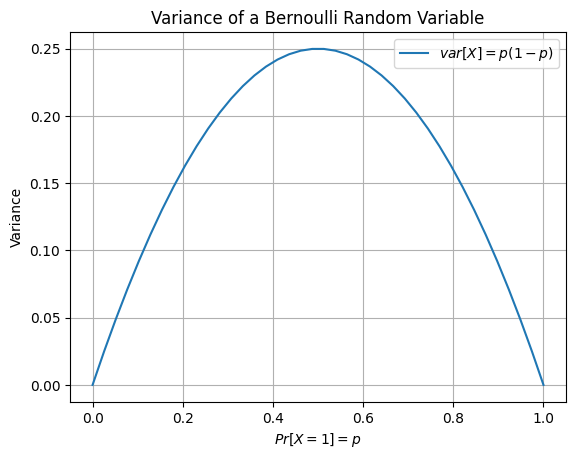

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range of success probabilities
m  = 40
p_ = np.linspace(0, 1, m)
#print(p_)

# Compute variance
o2 = p_ * (1 - p_)

# Plot variance against success probability
plt.plot(p_, o2, label='$var[X] = p(1-p)$')
plt.xlabel('$Pr[X=1] = p$')
plt.ylabel('Variance')
plt.title('Variance of a Bernoulli Random Variable')
plt.legend()
plt.grid(True)
plt.show()


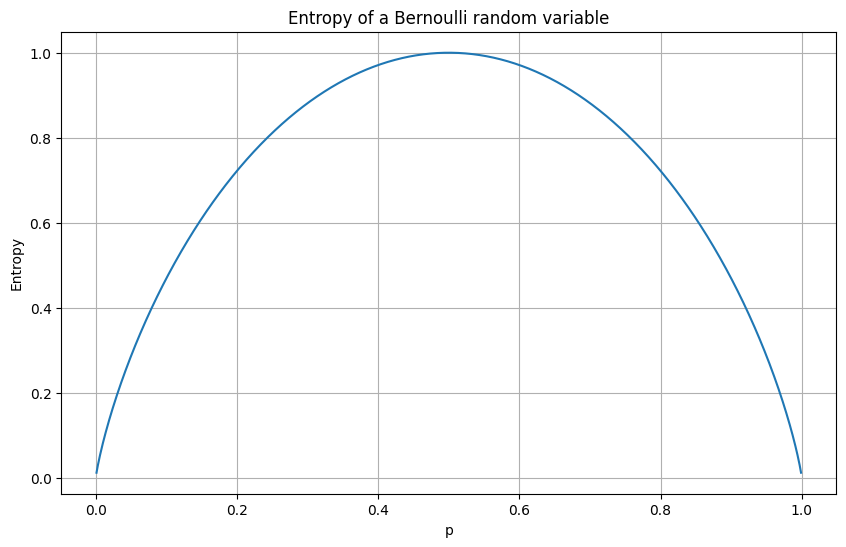

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of probabilities from a small number close to 0 to a number close to 1
p = np.linspace(0.001, 0.999, 1000)

# Calculate the entropy
entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Plot the entropy
plt.figure(figsize=(10, 6))
plt.plot(p, entropy)
plt.title('Entropy of a Bernoulli random variable')
plt.xlabel('p')
plt.ylabel('Entropy')
plt.grid(True)
plt.show()


**Entropy**

Entropy is a way to quantify the uncertainty that is reduced after observing a random variable from a distribution.

Entropy is a way to measure information.

**Entropy of a random variable that can take value among $M$ values**

$$
H[X] \leq \log M.
$$

When all the possible outcomes are equally likely, then $H[X]=\log M$.


**Example: bernoulli random variable**
Imagine $X \sim Bernoulli(p)$.
When $p=1,0$ there is no **uncertainty reduced** after observing $X$. However, when $p=1/2$, there is uncertainty reduced.

It is reasonable to think that if $X \sim Bernoulli(p=0.5)$, then observing $X$ reduces the uncertainty, and reveals information equal to 1 bit.


**Entropy of a random variable**

Mathematically, there is way to compute the entropy of a discrete random variable $X$:
\begin{eqnarray}
H[X] &=& -E \Bigl [ \log \Pr[X] \Bigr] \\
&=& E \Bigl [ -\log \Pr[X] \Bigr]
\\
&=& E \Bigl [ Y \Bigr]
\end{eqnarray}
where $Y=  -\log \Pr[X]$. In other words, the entropy is the first moment of the random variable $Y$ that we just defined.

Another way to look at it:
\begin{eqnarray}
H[X] &=& -E \Bigl [ \log \Pr[X] \Bigr] \\
&=& - \sum_k \Pr[X=k] \log \Pr[X=k]
\end{eqnarray}

If we use $\log_2$ we quantify the entropy in terms of bits.

**Example: entropy of the bernoulli random variable**

\begin{eqnarray*}
H[X] &=& -E \Bigl [ \log \Pr[X] \Bigr] \\
&=& - \sum_k \Pr[X=k] \log \Pr[X=k] \\
&=& - \Pr[X=0] \log \Pr[X=0] -  \Pr[X=1] \log \Pr[X=1] \\
&=& - (1-p) \log_2 (1-p) -  p \log_2 p = H(p) \\
H(p=0) &=& 0 \\
H(p=1) &=& 0 \\
H(p=0.5) &=& -(1-0.5) \log_2 (1-0.5) - 0.5 \log_2 (0.5) = 1
\end{eqnarray*}




**Entropy**

If random varibale $X$ is discrete and takes values in $\{1, 2, \cdots, m \}$, then we can show that $H[X] \leq \log_2 m$.

**Question**
What should be the probability distribution over the values $X$ can take such that $H[X]=\log_2 m$ ?

In [ ]:
import math
result = math.exp(1)  # This is essentially e^1
print(result)  # Output: approximately 2.718281828459045
result = math.exp(1/12)  # This is essentially e^1
print(result)  #

2.718281828459045
1.086904049521229


**Estimating $p$**

Imagine we run $n$ trials and we observe $k$ heads.

How can we estimate $p$ from this observation?

**Intuition**
Law of large numbers teaches us that for large number of observations, if we observe $X=k$ we have
\begin{eqnarray}
p &\simeq& \frac{k}{n}
\end{eqnarray}
for $X \sim Binomial(n,p)$.

**Hint**
\begin{eqnarray}
\log_a x &=& \frac{\log x}{\log a}  \\
\frac{d \log_a x}{dx} &=& \frac{1}{\log a} \frac{d \ln x}{dx} = \frac{1}{x \log a}
\end{eqnarray}


**Data Generating Process**
We know that the data is generated according to a binomoial distribution, meaning that
\begin{eqnarray}
X &\sim& Binomial(n,p) \\
\Pr \ [ X=k  ] &=& {n \choose k} p^k (1-p)^{n-k} \\
\text{log likelihood} &=& L(p) = \log \Pr \ [ X=k  ]  \\
&=&\log {n \choose k} + k \log p + (n-k) \log(1-p)
\end{eqnarray}

**Maximum Likelihood Estimate (MLE)**
Find the $p$ that maximizes $L(p)$:
\begin{eqnarray}
p_{MLE} &=& \arg\max_p L(p) = \arg \max \log \Pr[X=k]
\end{eqnarray}

For many problems in statistics, due to the concavity, to find the MLE estimate, we set the derivative of log likelihood to zero.
\begin{eqnarray}
\frac{d L(p)}{d p} &=&\frac{d}{dp} \log \Pr[X=k] = \frac{d}{dp} \left [\log {n \choose k} + k \log p + (n-k) \log(1-p) \right] \\
&=&  \frac{k}{p \log a} - \frac{n-k}{(1-p) \log a} \\
\frac{d L(p)}{d p}|_{p=p_{MLE}} &=& 0 \rightarrow p_{MLE}=... \\
\frac{d L(p)}{d p}|_{p=p_{MLE}} &=& 0= \frac{k}{p_{MLE} \log a} - \frac{n-k}{(1-p_{MLE}) \log a} \\
p_{MLE} &=& \frac{k}{n}
\end{eqnarray}


**Example**
We flip the coin $n=10$ times and we observe $k=4$ heads.
\begin{eqnarray}
X &\sim& Binomial(n,p) \\
\Pr \ [ X=k  ] &=& \Pr[X=4] = {n \choose k} p^k (1-p)^{n-k} \\
\text{log likelihood} &=& L(p) = \log \Pr \ [ X=k  ]  \\
&=&\log {n \choose k} + k \log p + (n-k) \log(1-p)
\\ &=& \log {10 \choose 4}  + 4 \log p + 6 \log(1-p)
\end{eqnarray}

In the code below, we compute $L(p)$ for $p$ values between 0 and 1. In other words, we don't know the value of $p$ but what we know is that out of $n=10$ trials we observed $k=4$ heads. Now for different values of $p$ we can compute the probability of observing 4 heads out of 10 trials.

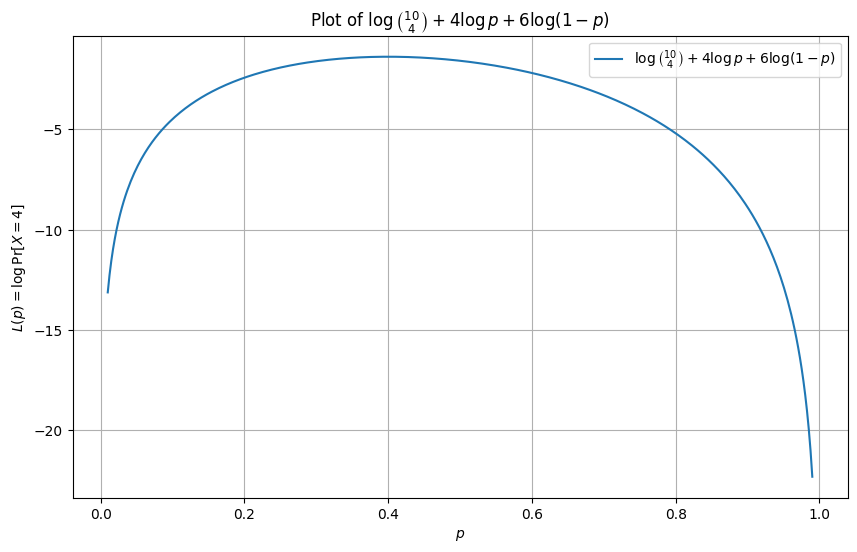

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Compute n choose k
def nCk(n, k):
    return math.comb(n, k)

# Function to be plotted
def f(p):
    return math.log(nCk(10, 4)) + 4 * np.log(p) + 6 * np.log(1 - p)

# Generate p values
p_values = np.linspace(0.01, 0.99, 400)  # we avoid 0 and 1 for log to be defined

# Calculate function values
f_values = [f(p) for p in p_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(p_values, f_values, label=r'$\log \binom{10}{4} + 4 \log p + 6 \log(1-p)$')
plt.title(r'Plot of $\log \binom{10}{4} + 4 \log p + 6 \log(1-p)$')
plt.xlabel('$p$')
plt.ylabel('$L(p) = \log \Pr[X=4]$')
plt.legend()
plt.grid(True)
plt.show()


**Multinomial distribution**
Imagine you have $|V|$ types, meaning that $X \in \{a_1,a_2,a_3,\cdots,a_{|V|}\}$ where $a_i$ is the $i$th type, and in each trial we observe each type with probability $p_m$:

\begin{eqnarray}
\Pr[X=m] &=& p_m \\
\hat p_m &=& \frac{\text{the number of times the $m$th type was observed}}{\text{total number of words}}
\end{eqnarray}

**Example: bag of words and text analysis**
Example: I am writing this sentence because this sentence is interesting ______


*   vocabulary size = 8
*   text size = 10
*   I 1, am 2, writing 3, this 4, sentence 5, because 6, is 7, interesting 8.
* $\hat p_1 =\hat p_2=\hat p_3 = 1/10, \hat p_4 =  \hat p_5 =2/10, \hat p_6=\hat p_7 = \hat p_8 =1/10 $

In a unigram model, the next word is selected randomly based on the probability of that word appearing in the text. So in other words, the unigram model does NOT take into account the previous word.


**Sequence of words**

$X_1, X_2, \cdots, X_{\ell-1}, X_{\ell}, X_{\ell+1}, \cdots$

**Unigram**
\begin{eqnarray}
\Pr [ X_{\ell} ]
\end{eqnarray}

**Bigram**
\begin{eqnarray}
\Pr [ X_{\ell} | X_{\ell-1} ]
\end{eqnarray}



**Example: Guttenberg project, melville-moby_dick**

**Example: entropy of the text as a random word generator**



**Quantifying the difference between texts**

* Text 1 which gives us $\hat p_1 = [\hat p_{1,1}, \hat p_{1,2}, \cdots, \hat p_{1,M}]$

* Text 2 which gives us $\hat p_2 = [\hat p_{2,1}, \hat p_{2,2}, \cdots, \hat p_{2,M}]$

* Text 3 which gives us $\hat p_3 = [\hat p_{3,1}, \hat p_{3,2}, \cdots, \hat p_{3,M}]$

.
.
.
* Text L which gives us $\hat p_L = [\hat p_{L,1}, \hat p_{L,2}, \cdots, \hat p_{L,M}]$






**Distances in vector spaces**

Consider the following two vectors:
\begin{eqnarray}
x &=& [x_1, x_2, \cdots, x_n]^\top =  \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
 \\
y &=& [y_1, y_2, \cdots, y_n]^\top  = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
\end{eqnarray}


**Transpose of Matrix or Vector**
\begin{eqnarray}
A_{2 \times 2} &=& \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix} \\
x_{2 \times 1} &=& \begin{bmatrix}
x_1 \\
x_2  \\
\end{bmatrix} \\
y_{2 \times 1}=Ax &=& \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix} \begin{bmatrix}
x_1 \\
x_2  \\
\end{bmatrix} =\begin{bmatrix}
a_{11} x_1 + a_{12} x_2 \\
a_{21} x_1 + a_{22} x_2 \\
\end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
x^T A &=&
\begin{bmatrix}
x_1 & x_2 \\
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix} = \begin{bmatrix}
x_1 a_{11} + x_2 a_{21}  \quad  x_2 a_{12} + x_2 a_{2}   
\end{bmatrix}
\end{eqnarray}

Consider the following two vectors:
\begin{eqnarray}
x &=&   \begin{bmatrix}
x_1 \\
x_2 \\
\end{bmatrix}
 \\
y &=&  \begin{bmatrix}
y_1 \\
y_2 \\
\end{bmatrix}
\end{eqnarray}
A vector is point in space. So we can measure the distance between vectors $x$ and $y$:

\begin{eqnarray}
d(x,y) &=&\sqrt{ (x_1-y_1)^2 + (x_2 - y_2)^2 }
\end{eqnarray}

* The length of a vector $x$ is $d(x,\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}) = \sqrt{ x_1^2 + x_2^2 } = \sqrt{x^\top x}$.

\begin{eqnarray*}
x^\top x &=& \begin{bmatrix}
x_1 \\
x_2 \\
\end{bmatrix}^\top \begin{bmatrix}
x_1 \\
x_2 \\
\end{bmatrix} =
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\end{bmatrix} = x_1^2 + x_2^2
\end{eqnarray*}

**Angles**

* $\theta_x = \arctan(x_2/x_2)$
* $\theta_y = \arctan(y_2/y_2)$
* length of $x$ is $\| x\| = \sqrt{x^\top x}$
* length of $y$ is $\| y\| = \sqrt{y^\top y}$
* inner product: $x^\top y = x_1 y_1 + x_2 y_2$

\begin{eqnarray*}
x^\top y &=&  \| x\| . \|y\| .  \cos \theta_{x,y} \\
\cos \theta_{x,y} &=& \frac{x^\top y}{\|x\| . \|y\|}
\end{eqnarray*}


For any matrix $A$, the diagonal elements are $A_{11}, A_{22}, A_{33}, \cdots$.










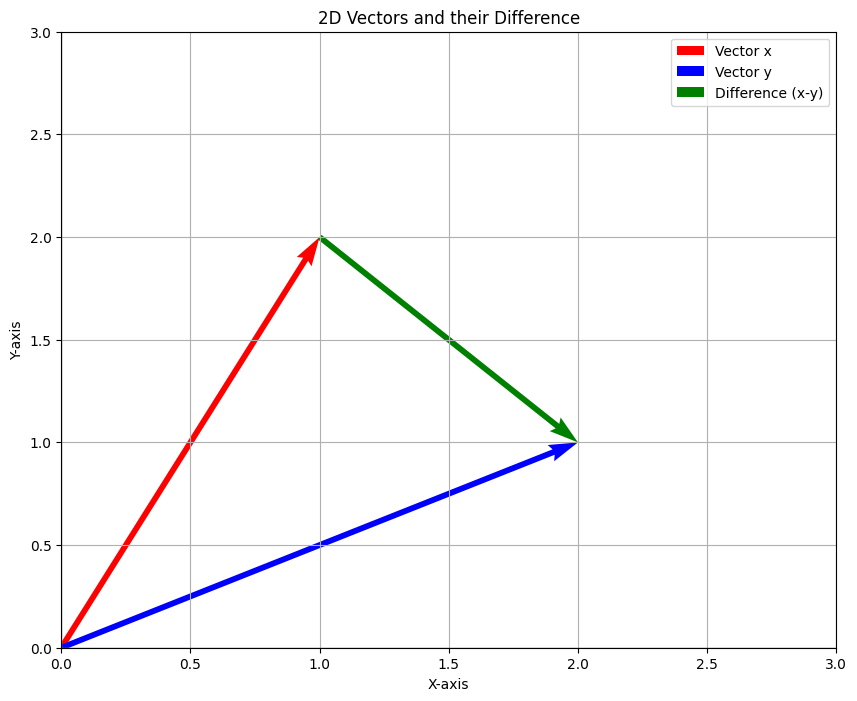

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define vectors
x = np.array([1, 2])
y = np.array([2, 1])
difference = x - y

# Plot the vectors
plt.figure(figsize=(10, 8))
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color="r", label="Vector x")
plt.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color="b", label="Vector y")
plt.quiver(x[0], x[1], -difference[0], -difference[1], angles='xy', scale_units='xy', scale=1, color="g", label="Difference (x-y)")

# Set the x and y limits of the plot
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.axvline(x=0, color='grey', lw=1)
plt.axhline(y=0, color='grey', lw=1)

# Add labels and show the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Vectors and their Difference')
plt.legend()
plt.grid(True)
plt.show()


**Language processing: Gutenberg Corpus**

1. `import nltk`: This line imports the Natural Language Toolkit (NLTK), which is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, and a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

2. `from nltk.tokenize import word_tokenize`: This line imports the `word_tokenize` function from NLTK's `tokenize` module. Tokenization is the process of breaking text down into words, phrases, symbols, or other meaningful elements called tokens. The `word_tokenize` function splits a piece of text (a sentence, a paragraph, etc.) into individual words.

3. `from nltk.probability import FreqDist`: This line imports the `FreqDist` class from NLTK's `probability` module. `FreqDist` is used to encode "frequency distributions", which count the number of times that each outcome of an experiment occurs. In the context of natural language processing, these outcomes are typically the individual words in a text, and thus `FreqDist` can be used to create a histogram of word frequency.

4. `import math`: This line imports Python's built-in `math` module. This module provides mathematical functions, including logarithmic, power, trigonometric, angular conversion, hyperbolic functions, etc. In this script, it's used for the logarithmic function to calculate entropy.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import math

In [ ]:
nltk.download('punkt')  # Required for word_tokenize
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


**Data generating process: text as a sequence of random symbols from a finite set**

A text can be seen as a sequence $X_1, X_2, \cdots, X_{\ell-1}, X_{\ell}, X_{\ell+1}, \cdots, X_L$.

`length = len(tokens)` is $L$ whereas `unique_tokens = len(set(tokens))` gives us the number of unique words, in other words, $M$ where imagine you have $M$ types, meaning that $X \in \{1,2,3,\cdots,M\}$ and in each trial we observe each type with probability $p_m$:

\begin{eqnarray}
\Pr[X=m] &=& p_m
\end{eqnarray}

`len(freq_dist)` is equal to $M$.

`tokens` List: This list is assumed to contain individual tokens (words or punctuation) from a text. The code doesn't specify, but typically these tokens are derived from a process that splits raw text into individual words and punctuation. For instance, the word_tokenize function from the nltk.tokenize module can be used for this purpose.

`all_tokens` List: This list will eventually contain all tokens from all texts processed by the loop. Each iteration of the loop tokenizes a new text and then appends its tokens to all_tokens.

`.extend()` Method: The extend method of a list takes an iterable (e.g., another list) as an argument and adds each of its items to the list. This is different from the append method, which would add the entire list as a single item.





In [ ]:
import nltk
from nltk.corpus import gutenberg
from nltk.lm.preprocessing import padded_everygram_pipeline, pad_both_ends
from nltk.lm import Laplace
from nltk.util import ngrams

# Ensure necessary NLTK datasets are downloaded
nltk.download('gutenberg')
nltk.download('punkt')
print("------------------------------------------------------------ \n")
# Load 'moby_dick.txt' from the gutenberg dataset and tokenize
words = gutenberg.words('melville-moby_dick.txt')

# Split data into training and test sets
train_seq, test_seq = words[:int(0.9*len(words))], words[int(0.9*len(words)):]

N_train= len(train_seq)
# Printing some elements from start, middle and end
print(train_seq[0:9] , "........" , train_seq[N_train//2-6:N_train//2+6] , "........" , train_seq[-9:],"\n")
print("number of tokes in train sequence is ", N_train,"\n")
print("------------------------------------------------------------ \n")

N_test= len(test_seq)
# Printing some elements from start, middle and end
print(test_seq[0:9] , "........" , test_seq[N_test//2-6:N_test//2+6] , "........" , test_seq[-9:],"\n")
print("number of tokes in test sequence is ", N_test,"\n")

# Compute vocabulary size for train, test, and all data
vocab_train = set(train_seq)
vocab_test = set(test_seq)
vocab_all = set(words)

size_vocab_train = len(vocab_train)
size_vocab_test = len(vocab_test)
size_vocab_all = len(vocab_all)

# Compute the intersection between the vocabularies of train and test
vocab_intersection = vocab_train & vocab_test
size_vocab_intersection = len(vocab_intersection)

# Print the results
print("------------------------------------------------------------ \n")
print(f"Vocabulary size of training data: {size_vocab_train}")
print(f"Vocabulary size of testing data: {size_vocab_test}")
print("------------------------------------------------------------")
print(f"Number of words that are in both train and test vocab: {size_vocab_intersection}")

# Compute the symmetric difference between the vocabularies of train and test
vocab_symmetric_diff = vocab_train ^ vocab_test
size_vocab_symmetric_diff = len(vocab_symmetric_diff)

# Print additional results
print(f"Number of words that are unique to either train or test vocab (but not both): {size_vocab_symmetric_diff}")
print("------------------------------------------------------------")
print(f"Vocabulary size of all data: {size_vocab_all}")



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


------------------------------------------------------------ 

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY'] ........ ['upon', 'his', 'officers', 'to', 'manhandle', 'that', 'atrocious', 'scoundrel', ',', 'and', 'smoke', 'him'] ........ ['--', 'he', 'called', 'for', 'linen', 'thread', ';', 'and', 'moving'] 

number of tokes in train sequence is  234737 

------------------------------------------------------------ 

['to', 'the', 'binnacle', ',', 'slipped', 'out', 'the', 'two', 'reversed'] ........ ['down', ',', 'the', 'sheets', 'of', 'their', 'sails', 'adrift', ',', 'the', 'three', 'boats'] ........ ['her', 'missing', 'children', ',', 'only', 'found', 'another', 'orphan', '.'] 

number of tokes in test sequence is  26082 

------------------------------------------------------------ 

Vocabulary size of training data: 18563
Vocabulary size of testing data: 4273
------------------------------------------------------------
Number of words that are in both tr

[<generator object everygrams at 0x781919b0f680>, <generator object everygrams at 0x781919b0f680>, <generator object everygrams at 0x781919b0f680>]
1
234739
['<s>', '[', 'Moby', 'Dick', 'by'] ........ ['to', 'manhandle', 'that', 'atrocious', 'scoundrel', ','] ........ ['thread', ';', 'and', 'moving', '</s>']




### n-gram model:

An `n-gram` model breaks down text into chunks of `n` consecutive words. For example:
- **Unigrams (1-gram)**: "I", "love", "programming"
- **Bigrams (2-grams)**: "I love", "love programming"
- **Trigrams (3-grams)**: "I love programming"


For example, we can estmate the probabilities of the bigram model by computing:


$$
P(word2|word1) = \frac{count(word1, word2)}{count(word1)}
$$

For text prediction, an `n-gram` model would look at the previous `n-1` words to predict the `n`th word. The underlying assumption is that the likelihood of a word appearing only depends on the preceding `n-1` words, making it a Markov assumption.

Mathematically, for a trigram model, it represents the conditional probability as:

$ P(w_3 | w_1, w_2) $

where $ w_3$ is the word being predicted and $ w_1, w_2 $ are the two preceding words.

### Laplace Smoothing:

to handle situations where a specific `n`-gram might not have been observed in the training data, leading to a zero probability.

Imagine you're trying to estimate the probability of a word given the previous word, using a bigram model. If the bigram hasn't been seen in the training data, its count is zero, and so is its probability. This becomes problematic when you're trying to calculate probabilities for a sequence of words, as any sequence containing an unseen bigram would be assigned a zero probability.

**Laplace smoothing** fixes this by pretending we've seen every possible `n`-gram one more time than we actually have. Specifically, if the count of an `n`-gram in the training data is $ c$, after Laplace smoothing, it becomes $ c + 1 $.

The formula for Laplace smoothed probability for a bigram (word1, word2) is:

$$
P(word2|word1) = \frac{count(word1, word2) + 1}{count(word1) + |V|}
$$

where:
- $ count(word1, word2) $ is the number of times the bigram (word1, word2) appears in the training data.
- $ count(word1) $ is the number of times word1 appears.
- $ |V| $ is the size of the vocabulary (total number of unique words in the training data).



**bigram**

"This is sample text."

This is

is sample

sample text

text .

**trigram**

"This is sample text."

This is sample

is sample text

sample text .



In [ ]:
import nltk
import math
from nltk.corpus import gutenberg
from nltk.util import ngrams
from nltk.lm import MLE, Vocabulary

# Load 'moby_dick.txt' from the gutenberg dataset and tokenize
words = gutenberg.words('melville-moby_dick.txt')

# Split data into training and test sets
train_seq, test_seq = words[:int(0.9*len(words))], words[int(0.9*len(words)):]

# Define the order of the n-grams
n = 2

# Extract n-grams from train and test sequences
train_ngrams = list(ngrams(train_seq, n))
test_ngrams = list(ngrams(test_seq, n))

# Create vocabulary from the entire set of words
vocab_all = Vocabulary(words)

# Train the n-gram model with the created vocabulary
model = MLE(n, vocabulary=vocab_all)
model.fit([train_ngrams])

# Compute perplexity
train_perplexity = model.perplexity(train_ngrams)
test_perplexity = model.perplexity(test_ngrams)

# Compute log perplexity
train_log_perplexity = math.log(train_perplexity)
test_log_perplexity = math.log(test_perplexity)

# Print perplexities

print(f"MLE: Training Log Perplexity for {n}-gram model: {train_log_perplexity}")
print(f"MLE: Testing Log Perplexity for {n}-gram model: {test_log_perplexity}")
print("------------------------------------------------------------")

# Train the n-gram model with the created vocabulary
modelLap = Laplace(n, vocabulary=vocab_all)
modelLap.fit([train_ngrams])

# Compute perplexity
train_perplexity = modelLap.perplexity(train_ngrams)
test_perplexity = modelLap.perplexity(test_ngrams)

# Compute log perplexity
train_log_perplexity = math.log(train_perplexity)
test_log_perplexity = math.log(test_perplexity)

# Print perplexities
print("------------------------------------------------------------ \n")
print(f"Laplace: Training Log Perplexity for {n}-gram model: {train_log_perplexity}")
print(f"Laplace: Testing Log Perplexity for {n}-gram model: {test_log_perplexity}")
print("------------------------------------------------------------")

Training Log Perplexity for 2-gram model: 3.8271715845252747
Testing Log Perplexity for 2-gram model: inf
------------------------------------------------------------
------------------------------------------------------------ 

Laplace: Training Perplexity for 2-gram model: 7.797822931183528
Laplace: Testing Perplexity for 2-gram model: 8.140027595785044
------------------------------------------------------------


The perplexity of a probabilistic model on a test set is a measure of how well the probability distribution predicted by the model aligns with the actual distribution of the test set. The basic intuition is that a better model should assign higher probabilities to the sequences in the test set, resulting in a lower perplexity.

In terms of formula, the perplexity \( PP \) of a model on a test set is typically defined for language models as:

$ PP(W_{test}) = P(w_1 w_2 ... w_N)^{-\frac{1}{N}} = \frac{1}{P(w_1 w_2 ... w_N)^{\frac{1}{N}}}$

Where $ W_{test} $ is the test set, consisting of words $ w_1, w_2, ..., w_N $, and $N_{test} $ is the number of words in the test set. The term $P(w_1 w_2 ... w_N)$ is the probability of the entire sequence as given by the model.

For $n$-gram models, the probability of a sequence is typically calculated using the chain rule of probability, which for a bigram model, for instance, would look like:

$ P(w_1 w_2 ... w_N) = P(w_1) \times P(w_2|w_1) \times P(w_3|w_2) \times ... \times P(w_N|w_{N-1}) $

In practice, since probabilities can be very small, calculations are often done in log space to avoid numerical underflow. The perplexity is then derived from the negative average log likelihood of the test set.

The NLTK implementation follows these conventions. The actual formula it uses to compute perplexity is:

$$ PP = \exp(-\frac{1}{N} \sum_{i=1}^{N} \log P(w_i|w_{i-1})) $$

or

$$ \log PP = -\frac{1}{N} \sum_{i=1}^{N} \log P(w_i|w_{i-1}) $$


Where the sum goes over all words $ w_i $ in the test set, and $P(w_i|w_{i-1}) $ is the probability of word $ w_i $ given the preceding word $ w_{i-1} $ as estimated by the language model.

Padding plays a crucial role in n-gram language modeling, especially when it comes to the start and end of sentences or sequences. Let's delve into why padding is used and its importance:

1. **Marking the Start and End of Sequences**: In an $n$-gram model, the prediction of the next word is based on the previous $ n-1 $ words. But what about the prediction of the first word in a sentence? Or the second word in a trigram model? We need some way to account for these "edge cases." By padding the start of sentences with $ n-1 $ special tokens (often `<s>`), we can model the beginning of sentences. Similarly, adding an end token (often `</s>`) can help model sentence endings.

2. **Computing Probabilities**: Padding helps in computing probabilities for the start and end of sequences. For example, in a bigram model, the probability of the sentence beginning with the word "The" would be estimated as $ P(\text{"The"} | \text{"<s>"}) $. Without the start token, this probability wouldn't exist in our model.

3. **Consistency in N-gram Extraction**: Padding ensures that even for the start and end of sequences, we always consider n-grams of length $n $. Without padding, the first $n$-gram of a sentence in a trigram model would be a unigram, the second would be a bigram, and only from the third word onwards would we have trigrams.

4. **Vocabulary Considerations**: The padding tokens are indeed added to the vocabulary. This means that when probabilities are calculated, the padding tokens are treated as real words. However, because they are applied consistently to every sequence, their presence aids the model rather than distorting it.

In the context of the NLTK's n-gram modeling tools, there are indeed two specific padding tokens added by default:

1. **Start padding (`<s>`)**: This token denotes the start of a sequence. For an $n$-gram model, $ n-1$ start padding tokens are added at the beginning of each sequence. This is to ensure that even the first word of a sequence has a context of $n-1$ tokens.

2. **End padding (`</s>`)**: This token denotes the end of a sequence. One end padding token is added at the end of each sequence.

For example:

- In a bigram (2-gram) model, a sequence "Hello world" would be padded as: `<s> Hello world </s>`
- In a trigram (3-gram) model, the same sequence would be padded as: `<s> <s> Hello world </s>`
- For a 4-gram model: `<s> <s> <s> Hello world </s>`

And so on...

This padding helps in modeling the probabilities of words at the beginning and end of sequences as previously explained.

The `padded_everygram_pipeline` function to achieve two things:

Convert the tokenized sentences (`train_data`) into $n$-grams and pad them appropriately. The output of this process is stored in the train_data generator.
Flatten and pad the tokenized sentences. This output is stored in the `padded_sents_train` generator.


The `fit()` method of the NLTK language models expects two arguments:

1. A sequence of $n$-grams (`train_data`)
2. A sequence of words (`padded_sents_train`), which represents the flattened, padded training data.

The $n$-grams are used for training the model, while the sequence of words (padded sentences) serves to build the vocabulary and is also used in training. Both are essential.

To be precise, `train_data` is a sequence of n-grams, and these n-grams have padding added as necessary. For example, in a bigram model, the start of a sentence would be represented with a start pad and the first word of the sentence. Similarly, for higher-order n-gram models, multiple start pads might be added at the beginning of sentences to represent the n-1 preceding contexts.

On the other hand, `padded_sents_train` is the flattened version of the entire training data with padding. It's essentially a sequence of words.

The language model's `fit()` function uses the vocabulary from `padded_sents_train` to establish the set of possible words, and then uses `train_data` (the n-grams) to calculate the probabilities and train the model.


In [ ]:


all_tokens = []

# Go through each file ID (title) in the Gutenberg corpus
for fileid in gutenberg.fileids():
    # Load the raw text and convert to lowercase
    raw_text = gutenberg.raw(fileid).lower()

    # Tokenize the text (split into words)
    tokens = word_tokenize(raw_text)


    # Add tokens to all_tokens
    all_tokens.extend(tokens)

    # Create a frequency distribution of the tokens
    freq_dist = FreqDist(tokens)

    # Calculate the entropy
    prob_dist = nltk.MLEProbDist(freq_dist)  # Maximum Likelihood Estimation
    entropy = -sum(prob_dist.prob(word) * math.log(prob_dist.prob(word), 2) for word in freq_dist)
    unique_tokens = len(set(tokens))

    # Get the 10 most and least common tokens
    most_common = freq_dist.most_common(10)
    least_common = freq_dist.most_common()[:-11:-1]  # Get the last 10 items from the frequency list

    # Get the title, total unique tokens, length of the work, and the first 20 words
    title = fileid
    length = len(tokens)
    first_20_words = " ".join(tokens[:20])

    # Print the information
    print(f"Title: {title}")
    print(f"Number of unique tokens: {unique_tokens}")
    print(f"Length of work: {length}")
    print(f"First 20 words: {first_20_words}")
    print(f"10 most common words: {most_common}")
    print(f"10 least common words: {least_common}")
    print(f"Entropy: {entropy:.1f}")

    # Calculate the number of unique words that are repeated only once
    unique_words_repeated_once = [word for word, count in freq_dist.items() if count == 1]
    num_unique_repeated_once = len(unique_words_repeated_once)
    percentage_unique_repeated_once = (num_unique_repeated_once / len(freq_dist)) * 100

    # Print the percentage of unique words repeated once
    print(f"Percentage of vocabulary including words occured once: {percentage_unique_repeated_once:.1f}%")


    # Calculate the number of unique words that are repeated 2-10 times
    unique_words_repeated_between_ = [word for word, count in freq_dist.items() if 2 <= count <= 10]   # Change count to 4
    num_unique_repeated_between_ = len(unique_words_repeated_between_)
    percentage_unique_repeated_between_ = (num_unique_repeated_between_ / len(freq_dist)) * 100

    # Print the percentage of unique words repeated 2-10 times
    print(f"Percentage of vocabulary including words repeated between 2 and 10 times: {percentage_unique_repeated_between_:.1f}%")  # Update the print statement



    # Calculate the number of unique words that are repeated between 11 and 100 times
    unique_words_repeated_between = [word for word, count in freq_dist.items() if 10 < count <= 100]  # Check if count is between 11 and 100
    num_unique_repeated_between = len(unique_words_repeated_between)
    percentage_unique_repeated_between = (num_unique_repeated_between / len(freq_dist)) * 100

    # Print the percentage of unique words repeated between 11 and 100 times
    print(f"Percentage of vocabulary including words repeated between 11 and 100 times: {percentage_unique_repeated_between:.1f}%")  # Update the print statement

    # Calculate the number of unique words that are repeated more than one hundred times
    unique_words_repeated_more_than_hundred = [word for word, count in freq_dist.items() if count > 100]  # Check if count is more than 100
    num_unique_repeated_more_than_hundred = len(unique_words_repeated_more_than_hundred)
    percentage_unique_repeated_more_than_hundred = (num_unique_repeated_more_than_hundred / len(freq_dist)) * 100

    # Print the percentage of unique words repeated more than one hundred times
    print(f"Percentage of unique words repeated more than one hundred times: {percentage_unique_repeated_more_than_hundred:.1f}%")  # Update the print statement


    print()

print(f"Total number of unique tokens across all texts: {len(set(all_tokens))}\n")


Title: austen-emma.txt
Number of unique tokens: 7944
Length of work: 191781
First 20 words: [ emma by jane austen 1816 ] volume i chapter i emma woodhouse , handsome , clever , and rich
10 most common words: [(',', 12016), ('.', 6351), ('the', 5201), ('to', 5181), ('and', 4877), ('of', 4284), ('i', 3177), ('a', 3124), ('--', 3100), ('it', 2503)]
10 least common words: [('finis', 1), ('band', 1), ('predictions', 1), ('deficiencies', 1), ('stare', 1), ('veils', 1), ('satin', 1), ('own.', 1), ('detailed', 1), ('weddings', 1)]
Entropy: 8.7
Percentage of vocabulary including words repeated once: 43.0%
Percentage of vocabulary including words repeated between 2 and 10 times: 40.6%
Percentage of vocabulary including words repeated between 11 and 100 times: 13.7%
Percentage of unique words repeated more than one hundred times: 2.7%

Title: austen-persuasion.txt
Number of unique tokens: 5943
Length of work: 97917
First 20 words: [ persuasion by jane austen 1818 ] chapter 1 sir walter elliot , o

Title: austen-emma.txt
Number of unique tokens: 7944
Length of work: 191781
First 20 words: [ emma by jane austen 1816 ] volume i chapter i emma woodhouse , handsome , clever , and rich
10 most common words: [(',', 12016), ('.', 6351), ('the', 5201), ('to', 5181), ('and', 4877), ('of', 4284), ('i', 3177), ('a', 3124), ('--', 3100), ('it', 2503)]
10 least common words: [('finis', 1), ('band', 1), ('predictions', 1), ('deficiencies', 1), ('stare', 1), ('veils', 1), ('satin', 1), ('own.', 1), ('detailed', 1), ('weddings', 1)]
Entropy: 8.7
Percentage of vocabulary including words repeated once: 43.0%
Percentage of vocabulary including words repeated between 2 and 10 times: 40.6%
Percentage of vocabulary including words repeated between 11 and 100 times: 13.7%
Percentage of unique words repeated more than one hundred times: 2.7%

Title: austen-persuasion.txt
Number of unique tokens: 5943
Length of work: 97917
First 20 words: [ persuasion by jane austen 1818 ] chapter 1 sir walter elliot , o

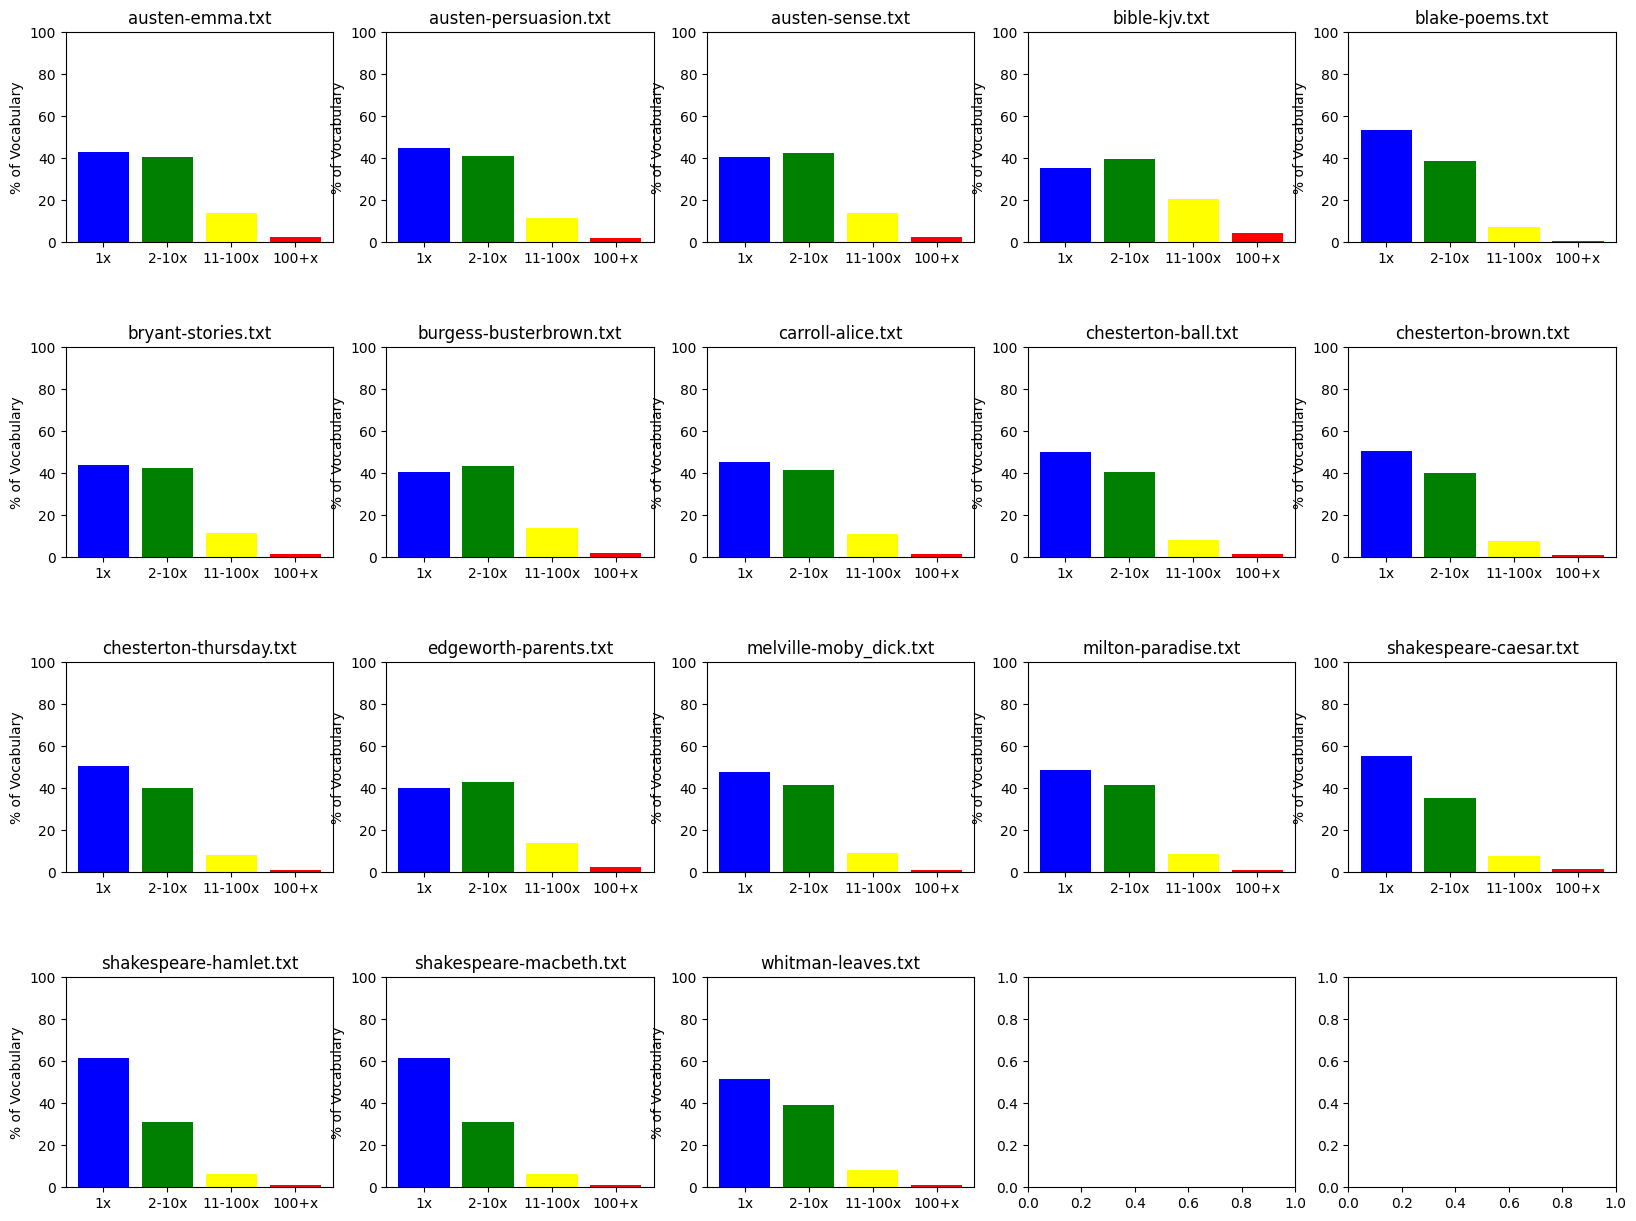

In [ ]:
import matplotlib.pyplot as plt

all_tokens = []


# Lists to store data for plotting
titles = []
percent_once = []
percent_2_10 = []
percent_11_100 = []
percent_100_plus = []

# Go through each file ID (title) in the Gutenberg corpus
for fileid in gutenberg.fileids():
    # Load the raw text and convert to lowercase
    raw_text = gutenberg.raw(fileid).lower()

    # Tokenize the text (split into words)
    tokens = word_tokenize(raw_text)


    # Add tokens to all_tokens
    all_tokens.extend(tokens)

    # Create a frequency distribution of the tokens
    freq_dist = FreqDist(tokens)

    # Calculate the entropy
    prob_dist = nltk.MLEProbDist(freq_dist)  # Maximum Likelihood Estimation
    entropy = -sum(prob_dist.prob(word) * math.log(prob_dist.prob(word), 2) for word in freq_dist)
    unique_tokens = len(set(tokens))

    # Get the 10 most and least common tokens
    most_common = freq_dist.most_common(10)
    least_common = freq_dist.most_common()[:-11:-1]  # Get the last 10 items from the frequency list

    # Get the title, total unique tokens, length of the work, and the first 20 words
    title = fileid
    length = len(tokens)
    first_20_words = " ".join(tokens[:20])

    # Print the information
    print(f"Title: {title}")
    print(f"Number of unique tokens: {unique_tokens}")
    print(f"Length of work: {length}")
    print(f"First 20 words: {first_20_words}")
    print(f"10 most common words: {most_common}")
    print(f"10 least common words: {least_common}")
    print(f"Entropy: {entropy:.1f}")

    # Calculate the number of unique words that are repeated only once
    unique_words_repeated_once = [word for word, count in freq_dist.items() if count == 1]
    num_unique_repeated_once = len(unique_words_repeated_once)
    percentage_unique_repeated_once = (num_unique_repeated_once / len(freq_dist)) * 100

    # Print the percentage of unique words repeated once
    print(f"Percentage of vocabulary including words repeated once: {percentage_unique_repeated_once:.1f}%")


    # Calculate the number of unique words that are repeated 2-10 times
    unique_words_repeated_between_ = [word for word, count in freq_dist.items() if 2 <= count <= 10]   # Change count to 4
    num_unique_repeated_between_ = len(unique_words_repeated_between_)
    percentage_unique_repeated_between_ = (num_unique_repeated_between_ / len(freq_dist)) * 100

    # Print the percentage of unique words repeated 2-10 times
    print(f"Percentage of vocabulary including words repeated between 2 and 10 times: {percentage_unique_repeated_between_:.1f}%")  # Update the print statement



    # Calculate the number of unique words that are repeated between 11 and 100 times
    unique_words_repeated_between = [word for word, count in freq_dist.items() if 10 < count <= 100]  # Check if count is between 11 and 100
    num_unique_repeated_between = len(unique_words_repeated_between)
    percentage_unique_repeated_between = (num_unique_repeated_between / len(freq_dist)) * 100

    # Print the percentage of unique words repeated between 11 and 100 times
    print(f"Percentage of vocabulary including words repeated between 11 and 100 times: {percentage_unique_repeated_between:.1f}%")  # Update the print statement

    # Calculate the number of unique words that are repeated more than one hundred times
    unique_words_repeated_more_than_hundred = [word for word, count in freq_dist.items() if count > 100]  # Check if count is more than 100
    num_unique_repeated_more_than_hundred = len(unique_words_repeated_more_than_hundred)
    percentage_unique_repeated_more_than_hundred = (num_unique_repeated_more_than_hundred / len(freq_dist)) * 100

    # Print the percentage of unique words repeated more than one hundred times
    print(f"Percentage of unique words repeated more than one hundred times: {percentage_unique_repeated_more_than_hundred:.1f}%")  # Update the print statement

    # Append data for plotting
    titles.append(title)
    percent_once.append(percentage_unique_repeated_once)
    percent_2_10.append(percentage_unique_repeated_between_)
    percent_11_100.append(percentage_unique_repeated_between)
    percent_100_plus.append(percentage_unique_repeated_more_than_hundred)

    print()

print(f"Total number of unique tokens across all texts: {len(set(all_tokens))}\n")

# Plotting
fig, axs = plt.subplots(4, 5, figsize=(20, 15))  # 4x5 subplots
fig.subplots_adjust(hspace=0.5)

for i, title in enumerate(titles):
    row = i // 5
    col = i % 5
    axs[row, col].bar(["1x", "2-10x", "11-100x", "100+x"],
                     [percent_once[i], percent_2_10[i], percent_11_100[i], percent_100_plus[i]],
                     color=['blue', 'green', 'yellow', 'red'])
    axs[row, col].set_title(title)
    axs[row, col].set_ylim([0, 100])
    axs[row, col].set_ylabel('% of Vocabulary')

plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


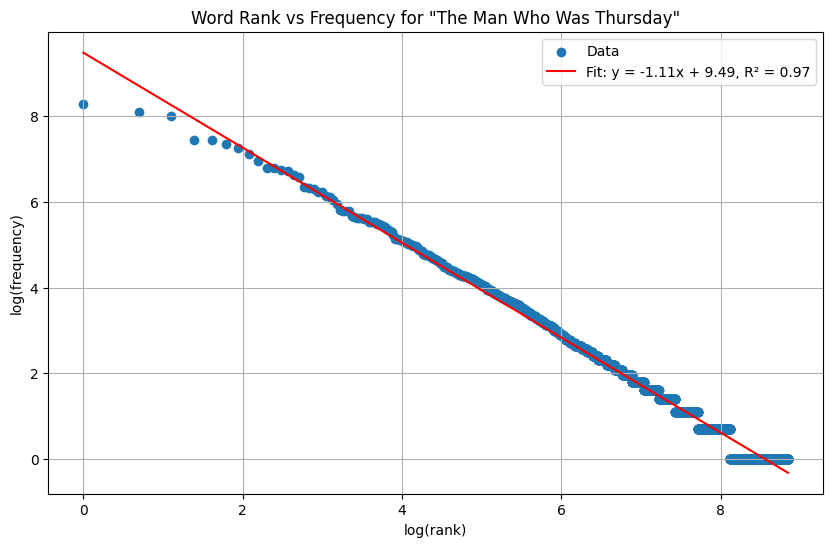

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from scipy.stats import linregress
import nltk

nltk.download('punkt')  # Required for word_tokenize

# Load the raw text
raw_text = gutenberg.raw('chesterton-thursday.txt')

# Tokenize the text (split into words)
tokens = word_tokenize(raw_text)

# Create a frequency distribution
freq_dist = FreqDist(tokens)

# Sort the frequency distribution in descending order
sorted_freq_dist = sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)

# Separate the words and their frequencies
words, frequencies = zip(*sorted_freq_dist)

# Create ranks
ranks = np.arange(1, len(frequencies)+1)

# Convert to logarithmic scale
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(log_ranks, log_frequencies)

# Generate coordinates for the regression line
line_x = np.linspace(min(log_ranks), max(log_ranks), 500)
line_y = slope * line_x + intercept

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(log_ranks, log_frequencies, label='Data')
plt.plot(line_x, line_y, color='red', label='Fit: y = {:.2f}x + {:.2f}, R² = {:.2f}'.format(slope, intercept, r_value**2))
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title('Word Rank vs Frequency for "The Man Who Was Thursday"')
plt.legend()
plt.grid(True)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


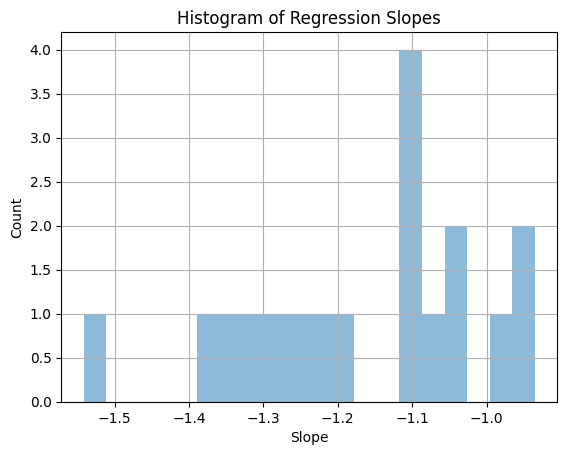

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from scipy.stats import linregress
import nltk

nltk.download('punkt')  # Required for word_tokenize

# List to store slopes for each work
slopes = []

# Go through each text in the Gutenberg corpus
for fileid in gutenberg.fileids():
    # Load the raw text
    raw_text = gutenberg.raw(fileid)

    # Tokenize the text (split into words)
    tokens = word_tokenize(raw_text)

    # Create a frequency distribution
    freq_dist = FreqDist(tokens)

    # Sort the frequency distribution in descending order
    sorted_freq_dist = sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)

    # Separate the words and their frequencies
    words, frequencies = zip(*sorted_freq_dist)

    # Create ranks
    ranks = np.arange(1, len(frequencies)+1)

    # Convert to logarithmic scale
    log_ranks = np.log(ranks)
    log_frequencies = np.log(frequencies)

    # Perform linear regression
    slope, _, _, _, _ = linregress(log_ranks, log_frequencies)

    # Append the slope to the list of slopes
    slopes.append(slope)

# Plot the histogram of slopes
plt.hist(slopes, bins=20, alpha=0.5)
plt.title('Histogram of Regression Slopes')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Zipf's law, named after the linguist George Kingsley Zipf, is an empirical law that states that many types of data studied in the physical and social sciences can be approximated with a Zipfian distribution. One of the most famous manifestations of this law is in language, where Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table.

In simpler terms, the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. For example, in one sample of words in the English language, the most frequently occurring word, "the", accounts for nearly 7% of all words, the second-most common word, "of", accounts for slightly over 3.5% of words, followed by "and", and so on.

In the context of the Gutenberg corpus, we can observe Zipf's law by plotting the rank of a word against its frequency on a log-log plot. If Zipf's law holds, we should see a straight line with a slope of approximately -1. The slopes you see in the histograms are indicative of how closely the distribution of words in the works follow Zipf's law. A slope of -1 would mean the distribution perfectly follows Zipf's law.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


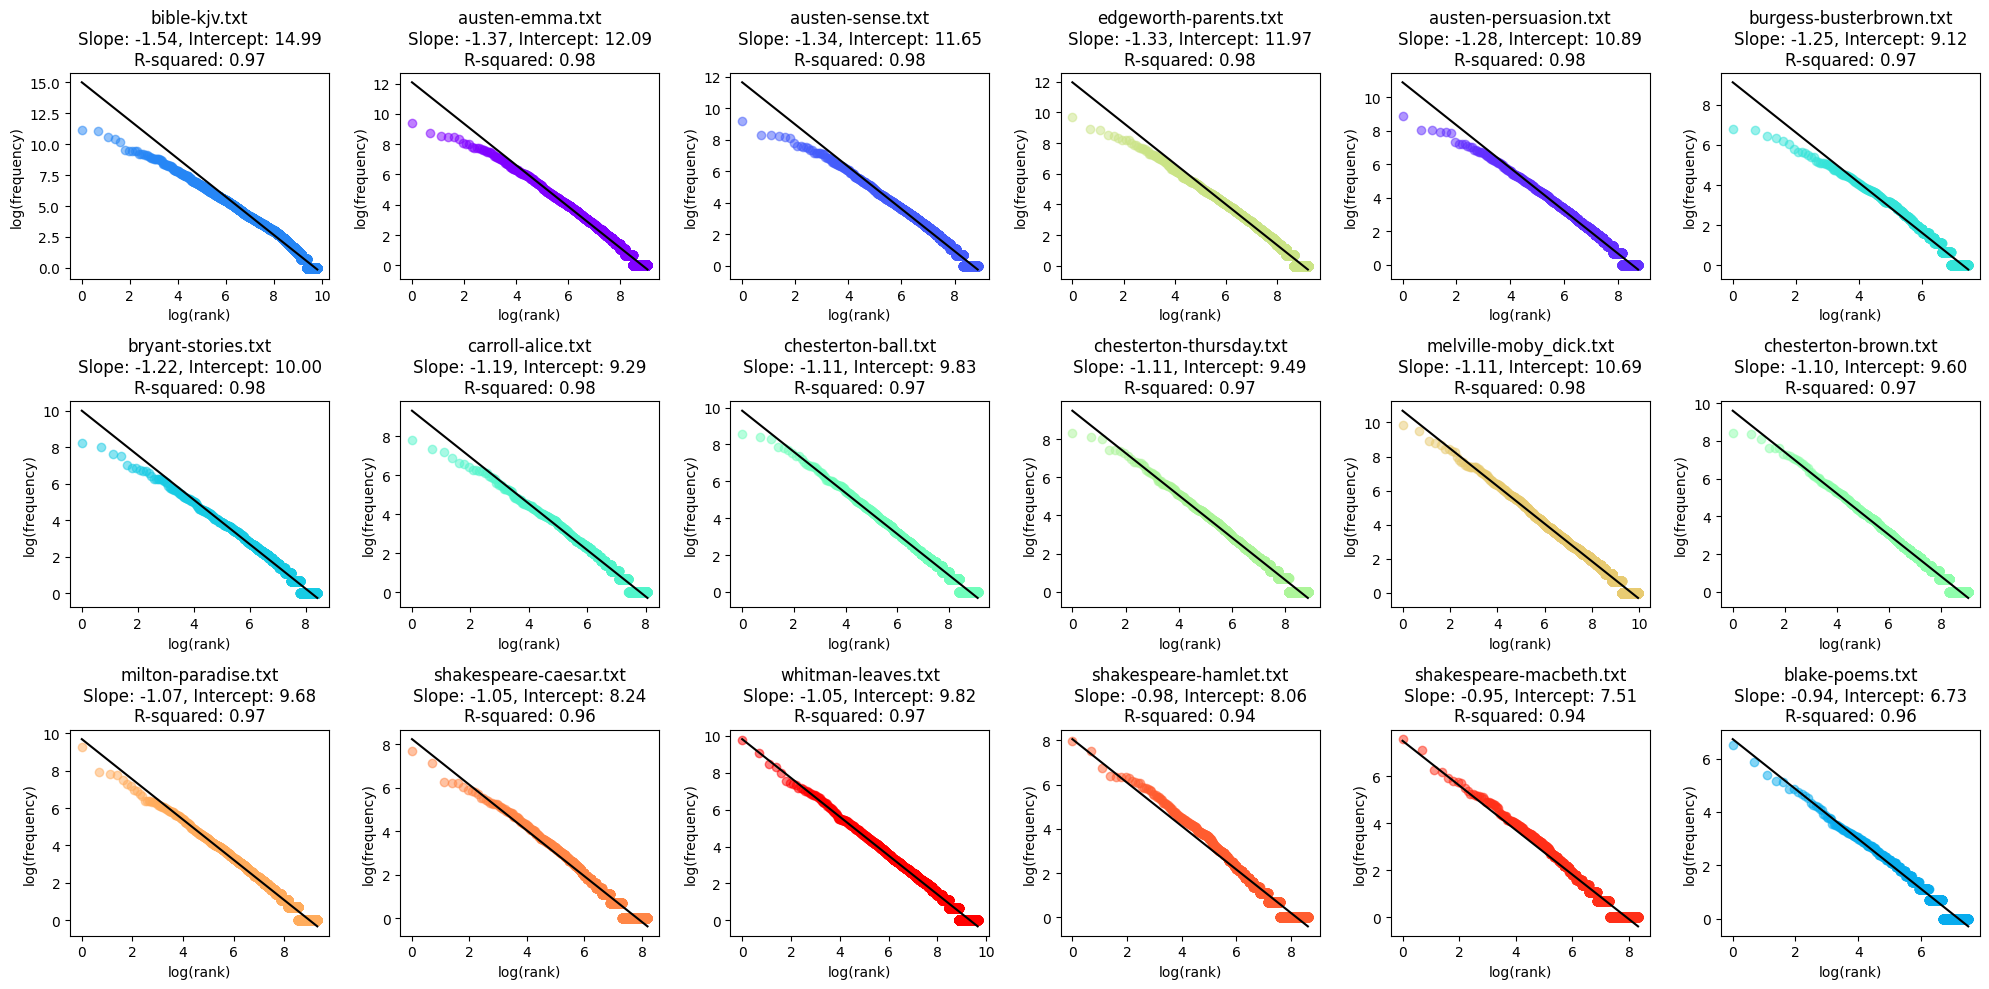

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from nltk.probability import FreqDist
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from scipy.stats import linregress
import nltk

nltk.download('punkt')  # Required for word_tokenize

# Define number of rows and columns for subplot grid
rows = 3
cols = 6

# Define color map for distinguishing texts
colors = cm.rainbow(np.linspace(0, 1, len(gutenberg.fileids())))

# Go through each text in the Gutenberg corpus
texts_data = []
for idx, fileid in enumerate(gutenberg.fileids()):
    # Load the raw text
    raw_text = gutenberg.raw(fileid)

    # Tokenize the text (split into words)
    tokens = word_tokenize(raw_text)

    # Create a frequency distribution
    freq_dist = FreqDist(tokens)

    # Sort the frequency distribution in descending order
    sorted_freq_dist = sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)

    # Separate the words and their frequencies
    words, frequencies = zip(*sorted_freq_dist)

    # Create ranks
    ranks = np.arange(1, len(frequencies)+1)

    # Convert to logarithmic scale
    log_ranks = np.log(ranks)
    log_frequencies = np.log(frequencies)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

    # Compute R-squared value
    r_squared = r_value**2

    # Store text data
    texts_data.append((fileid, slope, intercept, r_squared, log_ranks, log_frequencies, colors[idx]))

# Sort by slope
texts_data.sort(key=lambda x: x[1])

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 10))

for idx, (fileid, slope, intercept, r_squared, log_ranks, log_frequencies, color) in enumerate(texts_data):
    # Compute subplot indices
    r, c = divmod(idx, cols)

    # Plot rank-frequency
    axs[r, c].scatter(log_ranks, log_frequencies, color=color, alpha=0.5, label=fileid)
    axs[r, c].plot(log_ranks, intercept + slope*log_ranks, color='black')

    # Set title and labels
    axs[r, c].set_title(f'{fileid}\nSlope: {slope:.2f}, Intercept: {intercept:.2f}\nR-squared: {r_squared:.2f}')
    axs[r, c].set_xlabel('log(rank)')
    axs[r, c].set_ylabel('log(frequency)')

# Display plot
plt.tight_layout()
plt.show()




```python
term_document_dict = {token: [0] * len(gutenberg.fileids()) for token in overall_freq_dist}
```

is a dictionary comprehension that initializes the `term_document_dict` dictionary. :

1. **Dictionary Comprehension**: Just like list comprehensions, dictionary comprehensions provide a concise way to create dictionaries.

2. **`for token in overall_freq_dist`**: This iterates over every unique token (word) in the `overall_freq_dist`, which is a frequency distribution of all tokens from all texts.

3. **`token: [0] * len(gutenberg.fileids())`**: For each `token`, this code creates a key-value pair in the dictionary. The key is the `token` itself. The value is a list of zeros, where the length of the list is equal to the number of documents (texts) in the Gutenberg corpus.

The purpose of the list of zeros is to serve as a placeholder for the frequencies of each token in each document. Since we don't know these frequencies yet, we initialize them all to zero. Each position in the list corresponds to a specific document. As we iterate over the documents and calculate the frequency distributions, we will update these zeros with the actual frequencies.

To visualize this:

- Let's say the Gutenberg corpus has 3 texts (for simplicity): `['text1.txt', 'text2.txt', 'text3.txt']`.
- And let's assume our `overall_freq_dist` has only 2 unique tokens (words): `'apple'` and `'banana'`.

The `term_document_dict` after running the mentioned line would look like:

```python
{
    'apple': [0, 0, 0],   # Placeholder frequencies for 'apple' in 'text1.txt', 'text2.txt', and 'text3.txt'
    'banana': [0, 0, 0]  # Placeholder frequencies for 'banana' in 'text1.txt', 'text2.txt', and 'text3.txt'
}
```

As we proceed through the code, these zeros would get replaced with the actual frequencies of `'apple'` and `'banana'` in each of the three texts.

In [ ]:
import pandas as pd

all_tokens = []

# First, collect all the tokens from all the texts
for fileid in gutenberg.fileids():
    raw_text = gutenberg.raw(fileid).lower()
    tokens = word_tokenize(raw_text)
    all_tokens.extend(tokens)

# Calculate overall frequency and probability distributions
overall_freq_dist = FreqDist(all_tokens)
overall_prob_dist = nltk.MLEProbDist(overall_freq_dist)

# Calculate overall entropy
overall_entropy = -sum(overall_prob_dist.prob(word) * math.log(overall_prob_dist.prob(word), 2) for word in overall_freq_dist)


# Create a dictionary to store term frequencies for each document
term_document_dict = {token: [0] * len(gutenberg.fileids()) for token in overall_freq_dist}

# Populate the term-document matrix
for col_idx, fileid in enumerate(gutenberg.fileids()):
    raw_text = gutenberg.raw(fileid).lower()
    tokens = word_tokenize(raw_text)
    freq_dist = FreqDist(tokens)
    for token in freq_dist:
        term_document_dict[token][col_idx] = freq_dist[token]

# Convert the dictionary to a pandas DataFrame (i.e., the term-document matrix)
term_document_matrix = pd.DataFrame(term_document_dict, index=gutenberg.fileids())

# Optionally, transpose the matrix so that rows are tokens and columns are documents
term_document_matrix = term_document_matrix.transpose()

print(term_document_matrix)


            austen-emma.txt  austen-persuasion.txt  austen-sense.txt  \
,                     12016                   7024              9901   
the                    5201                   3328              4103   
and                    4877                   2786              3489   
.                      6351                   3118              4022   
of                     4284                   2568              3571   
...                     ...                    ...               ...   
they.                     0                      0                 0   
germinal                  0                      0                 0   
heart-thud                0                      0                 0   
blither                   0                      0                 0   
ushering                  0                      0                 0   

            bible-kjv.txt  blake-poems.txt  bryant-stories.txt  \
,                   70573              685                3855   
the

The `TfidfTransformer()` from `sklearn` calculates the Term Frequency-Inverse Document Frequency (TF-IDF) value for terms in documents. The computation of TF-IDF involves two primary components: Term Frequency (TF) and Inverse Document Frequency (IDF).

Here are the mathematical details:

1. **Term Frequency (TF)**: This is the number of times a word appears in a document divided by the total number of words in the document. It represents the relative frequency of a term \( t \) in a document \( d \) out of all the terms in the document.

$ \text{TF}(t,d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} $

2. **Inverse Document Frequency (IDF)**: This is the logarithm of the total number of documents divided by the number of documents containing the term \( t \). It gives a measure of how much information the word provides. The idea behind IDF is that words that appear frequently across many documents (e.g., "and", "the", "is") don't carry much meaningful information about the content of a specific document.

$ \text{IDF}(t) = \log \left( \frac{\text{Total number of documents}}{\text{Number of documents with term } t \text{ in it}} \right) $

However, to avoid division by zero (in cases where a term doesn't appear in any document), the formula typically has a slight modification:

 $ \text{IDF}(t) = \log \left( \frac{1 + \text{Total number of documents}}{1 + \text{Number of documents with term } t \text{ in it}} \right) + 1  $

3. **TF-IDF**: The TF-IDF score is then computed as the product of TF and IDF:

 $ \text{TF-IDF}(t,d) = \text{TF}(t,d) \times \text{IDF}(t)  $

In the context of the `TfidfTransformer()` from `sklearn`, when the transformer is fitted with the `term_document_matrix`, it learns the IDF values for each term in the vocabulary. The Inverse Document Frequency (IDF) is a measure of how rare or common a term is in a set of documents.

The formula for computing IDF for a term  $ t  $ is:
 $\text{IDF}(t) = \log\left(\frac{1 + n}{1 + \text{df}(t)}\right) + 1  $

Where:
-  $ n  $ is the total number of documents.
- $ \text{df}(t) $ is the number of documents containing the term $ t $.

When `TfidfTransformer()` from `sklearn` is fitted with a term-document matrix, it calculates the IDF for every term in the matrix. This matrix is usually the result of using a `CountVectorizer()` or similar that counts how often each term appears in each document. The transformer does not necessarily need the raw term-document matrix; it just needs the document frequencies for each term.

Once the transformer has been fitted and the IDFs are learned, you can transform a term-document matrix (typically a count matrix) to get the TF-IDF representations of the documents. This will weight the term frequencies (TF) by their IDFs.

The transformation of a term frequency $ \text{tf}(t, d) $ of term $ t $ in document $ d $ into a tf-idf value is:

$ \text{tf-idf}(t, d) = \text{tf}(t, d) \times \text{IDF}(t) $

Where:
- $ \text{tf}(t, d) $ is the term frequency of term $ t $ in document $ d $.
- $ \text{IDF}(t) $ is the inverse document frequency of term $t $ that we calculated earlier.

In practice, this means terms that are frequent in a specific document, but not in many documents across the corpus, will have higher TF-IDF values. Conversely, terms that are frequent across many or all documents will have lower TF-IDF values, because their IDF values will be low.

Remember, the idea behind TF-IDF is to find words that are important to the meaning of a specific document, relative to the entire corpus. Words that appear frequently in a single document, but not in many documents in the corpus, are likely to be more indicative of that document's unique content.

In [ ]:
!pip install adjustText


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!



Cumulative Explained Variance by Component:
Component 1: 0.22219073030387831
Component 2: 0.4004024458054156
Component 3: 0.5209664111443526
Component 4: 0.6028487362545698
Component 5: 0.6732625178423992
Component 6: 0.7335682012872959
Component 7: 0.7817322417843432
Component 8: 0.8147296657032992
Component 9: 0.8459525133607878
Component 10: 0.8735461655843526
Component 11: 0.900287162476364
Component 12: 0.9235527143985928
Component 13: 0.9466887990108729
Component 14: 0.9668013269900624
Component 15: 0.9801175934975765
Component 16: 0.9910678880296715
Component 17: 1.0
Component 18: 1.0


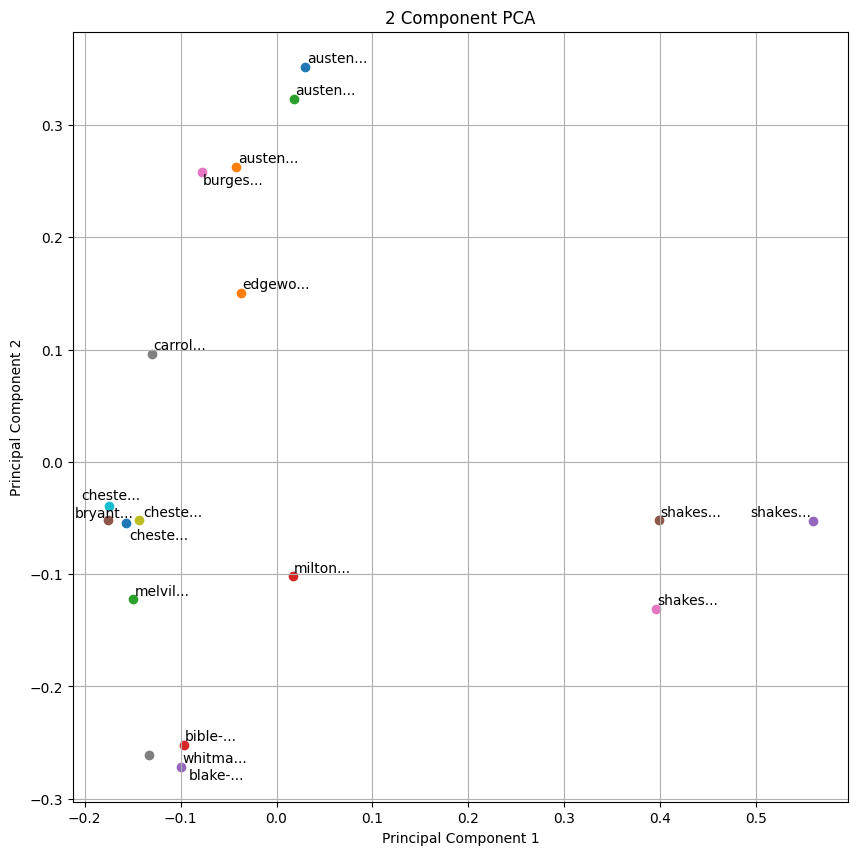

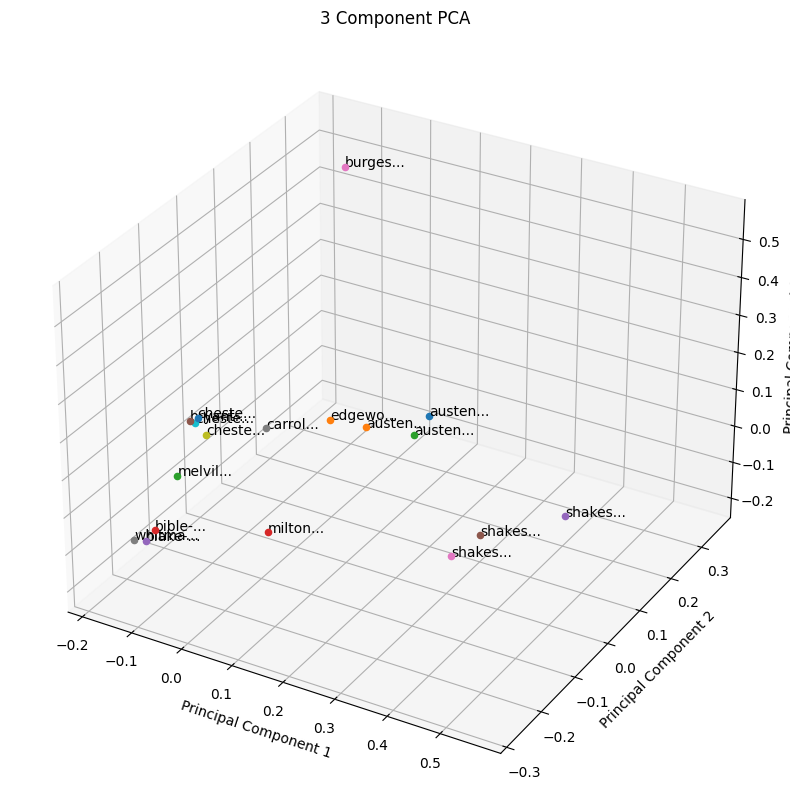

In [ ]:
import nltk
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from adjustText import adjust_text

nltk.download('punkt')  # Required for word_tokenize
nltk.download('gutenberg')

# Go through each text in the Gutenberg corpus
raw_texts = []
fileids = []  # To hold all file IDs for labels

for fileid in gutenberg.fileids():
    raw_text = gutenberg.raw(fileid)
    raw_texts.append(raw_text)
    fileids.append(fileid)  # Append file ID to list

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform raw_texts into tf-idf matrix
X = vectorizer.fit_transform(raw_texts).toarray()

# Initialize PCA
pca = PCA(n_components=18)

# Apply PCA to tf-idf matrix
principalComponents = pca.fit_transform(X)

# Print cumulative explained variance for each component
print("\nCumulative Explained Variance by Component:")
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, variance in enumerate(cumulative_explained_variance):
    print(f"Component {i+1}: {variance}")

# Plot PCA results in 2D
plt.figure(figsize=(10, 10))
texts = []  # Empty list to hold text labels
for i, label in enumerate(fileids):
    plt.scatter(principalComponents[i, 0], principalComponents[i, 1])
    texts.append(plt.text(principalComponents[i, 0], principalComponents[i, 1], label[:6] + '...'))  # Append abbreviated labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
adjust_text(texts)  # Call adjust_text after appending all the labels
plt.grid(True)
plt.show()

# Plot PCA results in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(fileids):
    ax.scatter(principalComponents[i, 0], principalComponents[i, 1], principalComponents[i, 2])
    ax.text(principalComponents[i, 0], principalComponents[i, 1], principalComponents[i, 2], label[:6] + '...')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3 Component PCA')
plt.grid(True)
plt.show()


This is a Python code that applies Principal Component Analysis (PCA) to the term-frequency inverse-document-frequency (TF-IDF) representation of the texts in the Gutenberg corpus, which is available in the NLTK library.



1. **Imports and Setup**:
   - Essential libraries and functions are imported. The `adjustText` library provides a way to prevent text labels from overlapping in plots.

2. **Data Collection**:
   - All text files from the Gutenberg corpus are loaded. The texts are appended to a list `raw_texts` and their respective IDs to a list `fileids`.

3. **TF-IDF Vectorization**:
   - The `TfidfVectorizer` from `sklearn` is used to transform the raw texts into a matrix where rows represent documents and columns represent unique words in the entire corpus. The values are weighted by the TF-IDF scores.
   
4. **PCA Analysis**:
   - PCA is initialized for 18 components. These 18 components are not displayed directly but are transformed into 2D and 3D for visualization.
   - The cumulative explained variance for each principal component is printed, allowing you to understand how much variance is captured by each component and in total by the first few components.

5. **2D Visualization**:
   - The first two principal components are plotted in 2D.
   - The texts (titles of the Gutenberg files) are labeled in the 2D space, and `adjust_text` is used to make sure the labels don't overlap.

6. **3D Visualization**:
   - The first three principal components are visualized in 3D.
   - Again, the text labels are added for each point.

This analysis allows you to visualize the relationships and similarities between the texts in the Gutenberg corpus. Texts that are close to each other in the PCA plot are similar in terms of their TF-IDF representation, while those farther apart are more distinct.

You can use this kind of analysis to discover patterns in a collection of texts, such as identifying which books are similar in style or content or understanding the main dimensions of variation in a large corpus.



1. **TF-IDF Transformation**: The Term Frequency-Inverse Document Frequency (TF-IDF) metric is computed for the `term_document_matrix`. This metric effectively balances out the importance of a term in a document with its frequency across all documents. Terms that are frequent in a document but not across many documents will get a high TF-IDF score, which makes it an ideal metric for text clustering.

2. **Cosine Similarity Computation**: The cosine similarity between the TF-IDF vectors of all pairs of documents is then calculated. This results in a matrix where the entry at position `(i, j)` represents how similar document `i` is to document `j`.

3. **KMeans Clustering**: Using the TF-IDF vectors, the KMeans algorithm clusters the documents. In your code, it clusters them into 5 groups (which can be adjusted).

4. **Visualization**: The cosine similarities between documents are visualized in two heatmaps: the original cosine similarity matrix and another reordered based on cluster labels. This visualization allows for a quick comparative glance to see how the clustering has grouped similar texts.

5. **Cluster Display**: The texts in each cluster are printed out.

This comprehensive workflow is a common approach in Natural Language Processing to understand and visualize the similarity and clustering of documents.

Cosine similarity is a common measure for text data. Cosine similarity considers the angle between two vectors, ignoring the magnitude of the vectors. This can be useful for text data since it primarily focuses on the orientation (i.e., the direction) of the vectors, not their magnitude.

* The matrix $X$ is an $18 \times 52968$ where each row stands for one of the $N=18$ texts and each column stands for one of the $M=52968$ words.

* $X_{i\ell}$ is the number of times the $\ell$th words was repeated in the $i$th text.

* $\theta_{i,j}$ is the angle between text $i$ and text $j$, or in other words, it is the angle between the two count vectors $X_{i.}$ and $X_{j.}$ where $X_{i.} = [X_{i1}, X_{i2}, \cdots, X_{iM}]$


`X` represents a matrix where each row corresponds to one of the texts from the `gutenberg` corpus, and each column corresponds to a token (word or punctuation) from the entire corpus. The values in this matrix represent the counts of each token in each text.



- The `CountVectorizer` from `sklearn.feature_extraction.text` is initialized with the vocabulary comprising all the tokens from the entire Gutenberg corpus. This ensures that the count vectors for all texts have the same length and order of features (tokens).

- `vectorizer.transform(raw_texts)` is used to convert the `raw_texts` (a list of raw texts from the Gutenberg corpus) into their corresponding count vectors. Each row in the resulting matrix corresponds to a text, and each column corresponds to a token in the vocabulary. The value at a specific position `(i, j)` in the matrix gives the count of the `j`-th token in the `i`-th text.

- `.toarray()` is called on the result to convert the sparse matrix representation into a dense numpy array.

So, `X` is a 2D numpy array with shape `(number of texts, number of tokens)`. Each entry in this matrix gives the count of a specific token in a specific text.

* `dist_matrix[i, j] = cosine(X[i], X[j])` where `dist_matrix` is the following:
\begin{eqnarray}
1- \begin{bmatrix}
\cos \theta_{1,1} & \cos \theta_{1,2} & \cdots & \cos \theta_{1,18} \\
\cos \theta_{2,1} & \cos \theta_{2,2} & \cdots & \cos \theta_{2,18} \\
\vdots & \vdots & \ddots & \vdots \\
\cos \theta_{18,1} & \cos \theta_{18,2} & \cdots & \cos \theta_{18,18} \\
\end{bmatrix}
\end{eqnarray}

`cosine(X[i], X[j])` is a function call from `scipy.spatial`.distance which computes the cosine distance, not the cosine similarity. The cosine distance is
1 - cosine similarity


            austen-emma.txt  austen-persuasion.txt  austen-sense.txt  \
,                  0.193147               0.124212          0.168668   
the                0.102264               0.071990          0.085500   
and                0.122563               0.077026          0.092925   
.                  0.263761               0.142462          0.177026   
of                 0.155959               0.102851          0.137777   
...                     ...                    ...               ...   
they.              0.000000               0.000000          0.000000   
germinal           0.000000               0.000000          0.000000   
heart-thud         0.000000               0.000000          0.000000   
blither            0.000000               0.000000          0.000000   
ushering           0.000000               0.000000          0.000000   

            bible-kjv.txt  blake-poems.txt  bryant-stories.txt  \
,                0.832203         0.017259            0.076585   
the

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


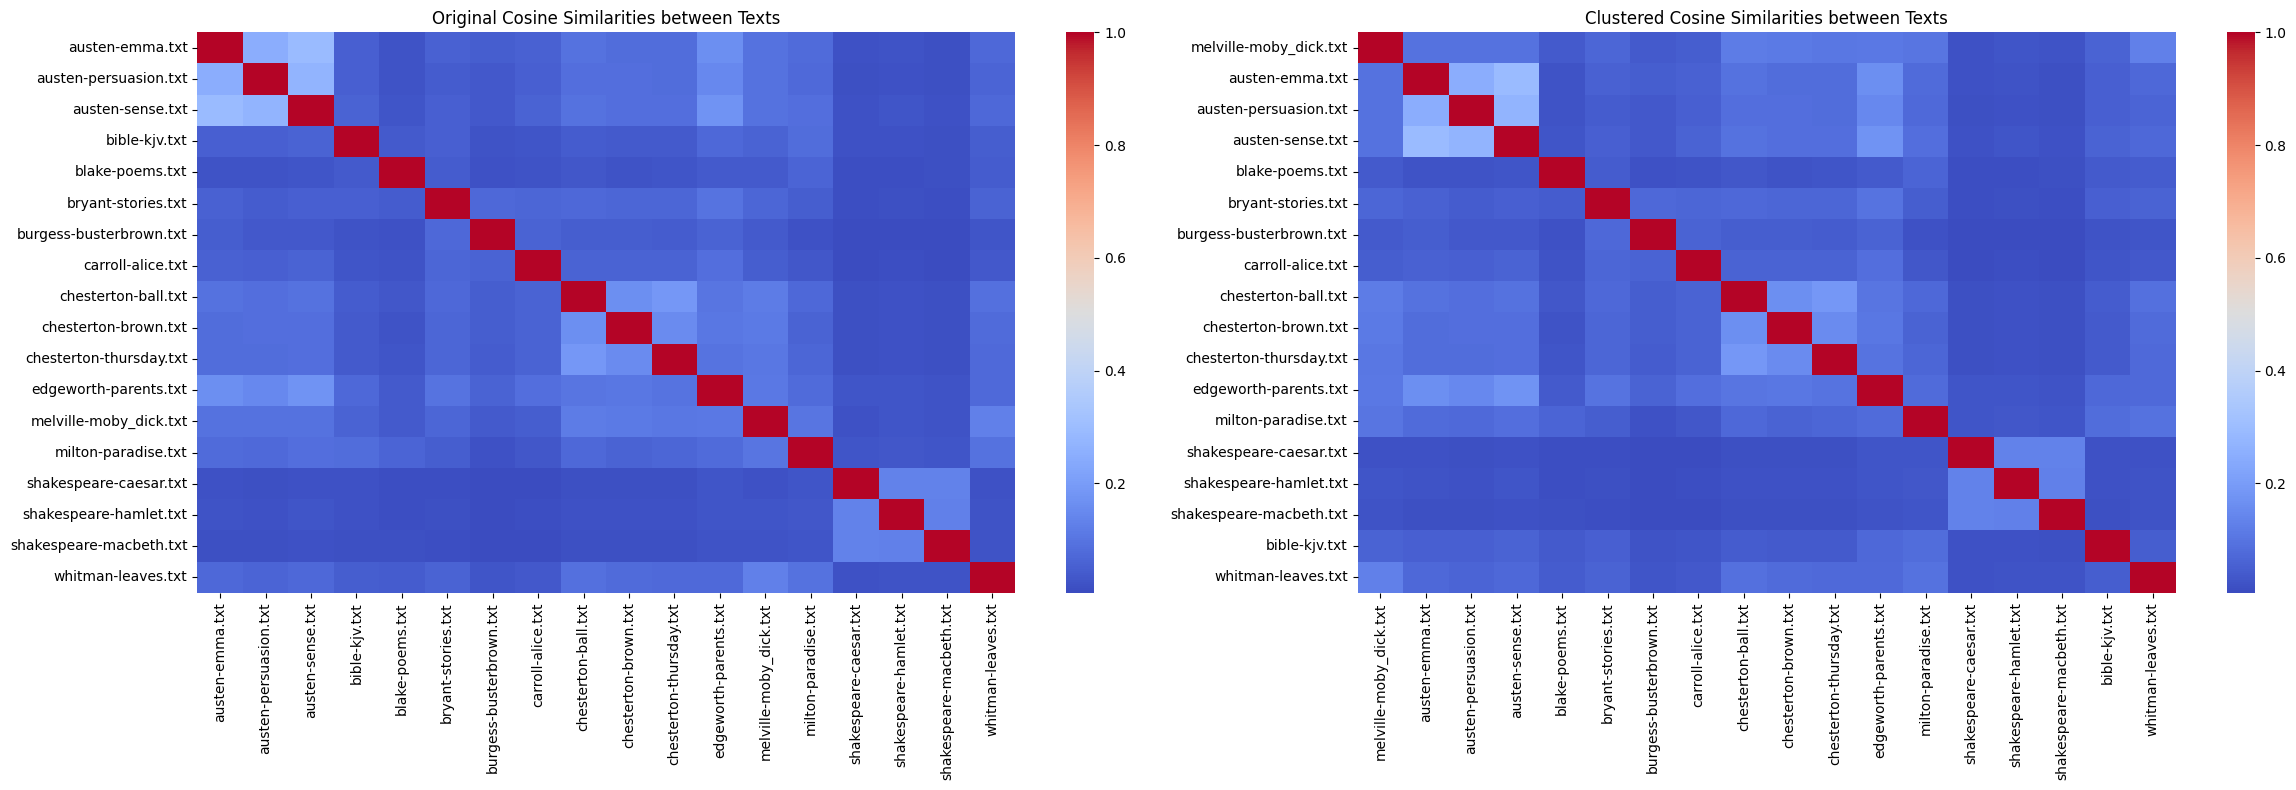


Clusters:
Cluster 0:
   - melville-moby_dick.txt
Cluster 1:
   - austen-emma.txt
   - austen-persuasion.txt
   - austen-sense.txt
   - blake-poems.txt
   - bryant-stories.txt
   - burgess-busterbrown.txt
   - carroll-alice.txt
   - chesterton-ball.txt
   - chesterton-brown.txt
   - chesterton-thursday.txt
   - edgeworth-parents.txt
   - milton-paradise.txt
   - shakespeare-caesar.txt
   - shakespeare-hamlet.txt
   - shakespeare-macbeth.txt
Cluster 2:
   - bible-kjv.txt
Cluster 3:
   - whitman-leaves.txt


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import seaborn as sns

# 1. Compute the TF-IDF matrix
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(term_document_matrix)

# Convert the matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=term_document_matrix.index, columns=term_document_matrix.columns)

print(tfidf_df)


# 2. Calculate cosine similarity between texts
cosine_similarities = cosine_similarity(tfidf_matrix.T)
cosine_sim_df = pd.DataFrame(cosine_similarities, index=gutenberg.fileids(), columns=gutenberg.fileids())

# 3. Cluster the texts using KMeans
number_of_clusters = 5  # You can change this number based on your requirements
kmeans = KMeans(n_clusters=number_of_clusters)
cluster_labels = kmeans.fit_predict(tfidf_matrix.T)

# Create a mapping from text to its cluster label
text_clusters = {fileid: label for fileid, label in zip(gutenberg.fileids(), cluster_labels)}

# Reorder the dataframe rows/columns based on cluster labels
ordered_fileids = sorted(gutenberg.fileids(), key=lambda x: text_clusters[x])
ordered_cosine_sim_df = cosine_sim_df.reindex(index=ordered_fileids, columns=ordered_fileids)

# Plot the original and reordered heatmaps side by side
plt.figure(figsize=(24, 8))

# Original heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cosine_sim_df, cmap='coolwarm')
plt.title("Original Cosine Similarities between Texts")

# Clustered heatmap
plt.subplot(1, 2, 2)
sns.heatmap(ordered_cosine_sim_df, cmap='coolwarm')
plt.title("Clustered Cosine Similarities between Texts")

plt.tight_layout()
plt.show()

print("\nClusters:")
for cluster_num in range(number_of_clusters):
    print(f"Cluster {cluster_num}:")
    for key, value in text_clusters.items():
        if value == cluster_num:
            print(f"   - {key}")


0
            austen-emma.txt  austen-persuasion.txt  austen-sense.txt  \
,                     12016                   7024              9901   
the                    5201                   3328              4103   
and                    4877                   2786              3489   
.                      6351                   3118              4022   
of                     4284                   2568              3571   
...                     ...                    ...               ...   
they.                     0                      0                 0   
germinal                  0                      0                 0   
heart-thud                0                      0                 0   
blither                   0                      0                 0   
ushering                  0                      0                 0   

            bible-kjv.txt  blake-poems.txt  bryant-stories.txt  \
,                   70573              685                3855   
t

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


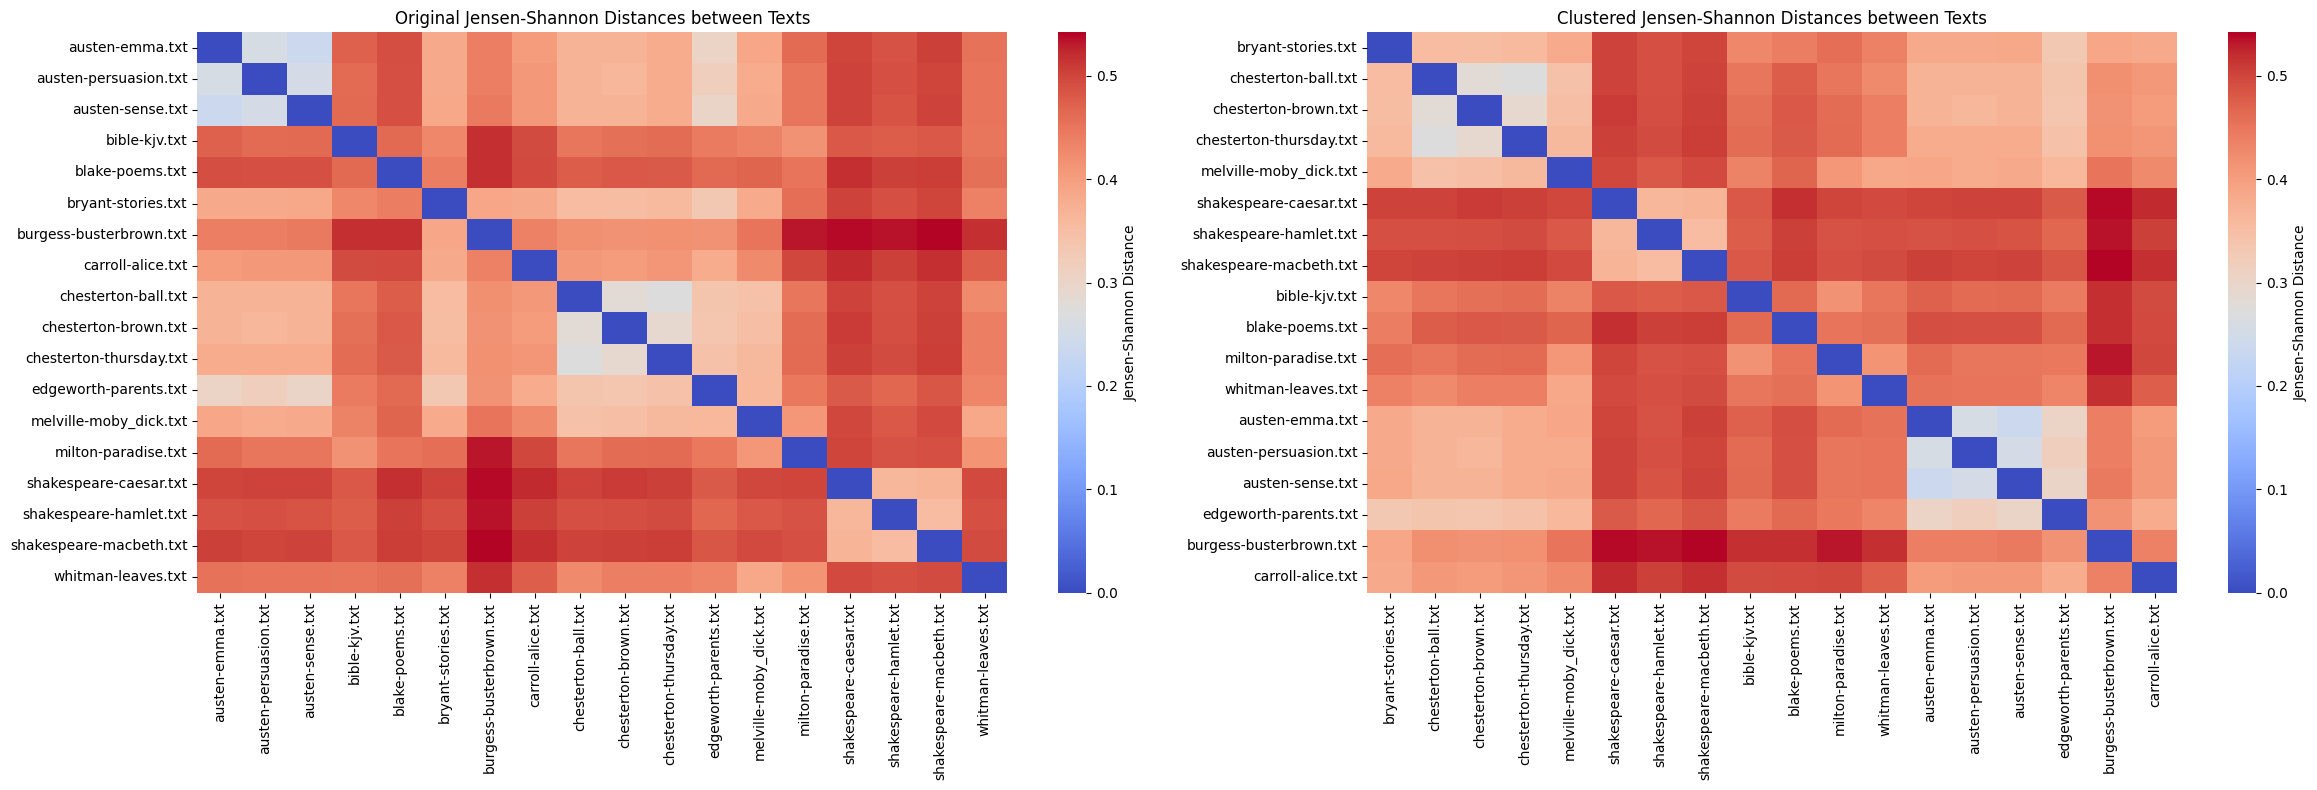


Clusters:
Cluster 0:
   - bryant-stories.txt
   - chesterton-ball.txt
   - chesterton-brown.txt
   - chesterton-thursday.txt
   - melville-moby_dick.txt
Cluster 1:
   - shakespeare-caesar.txt
   - shakespeare-hamlet.txt
   - shakespeare-macbeth.txt
Cluster 2:
   - bible-kjv.txt
   - blake-poems.txt
   - milton-paradise.txt
   - whitman-leaves.txt
Cluster 3:
   - austen-emma.txt
   - austen-persuasion.txt
   - austen-sense.txt
   - edgeworth-parents.txt
Cluster 4:
   - burgess-busterbrown.txt
   - carroll-alice.txt


In [ ]:
import numpy as np
from scipy.stats import entropy

# Convert term frequencies to term probabilities for each document
# word_probabilities = term_document_matrix.div(term_document_matrix.sum(), axis=0)

word_probabilities = term_document_matrix.copy()
for column in term_document_matrix.columns:
    word_probabilities[column] = term_document_matrix[column] / term_document_matrix[column].sum()

print(word_probabilities.isna().sum().sum())


print(term_document_matrix)
print(word_probabilities)

def jensen_shannon_divergence(p, q):
    """Compute the Jensen-Shannon divergence between two probability distributions."""
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))



def js_distance_matrix(matrix):
    """Compute the Jensen-Shannon distance matrix for a given matrix of probability distributions."""
    n_texts = matrix.shape[1]
    distances = np.zeros((n_texts, n_texts))
    for i in range(n_texts):
        for j in range(n_texts):
            distances[i, j] = np.sqrt(jensen_shannon_divergence(matrix.iloc[:, i].values, matrix.iloc[:, j].values))
    return distances

js_distances = js_distance_matrix(word_probabilities)
js_dist_df = pd.DataFrame(js_distances, index=gutenberg.fileids(), columns=gutenberg.fileids())

#print(js_dist_df)





# 3. Cluster the texts using KMeans
number_of_clusters = 5  # You can change this number based on your requirements
kmeans = KMeans(n_clusters=number_of_clusters)
cluster_labels = kmeans.fit_predict(js_distances)
# Create a mapping from text to its cluster label
text_clusters = {fileid: label for fileid, label in zip(gutenberg.fileids(), cluster_labels)}

# Reorder the dataframe rows/columns based on cluster labels
ordered_fileids = sorted(gutenberg.fileids(), key=lambda x: text_clusters[x])
ordered_js_dist_df = js_dist_df.reindex(index=ordered_fileids, columns=ordered_fileids)

# Plot the original and reordered heatmaps side by side
plt.figure(figsize=(24, 8))

# Original heatmap
plt.subplot(1, 2, 1)
sns.heatmap(js_dist_df, cmap='coolwarm', cbar_kws={"label": "Jensen-Shannon Distance"})
plt.title("Original Jensen-Shannon Distances between Texts")

# Clustered heatmap
plt.subplot(1, 2, 2)
sns.heatmap(ordered_js_dist_df, cmap='coolwarm', cbar_kws={"label": "Jensen-Shannon Distance"})
plt.title("Clustered Jensen-Shannon Distances between Texts")

plt.tight_layout()
plt.show()

print("\nClusters:")
for cluster_num in range(number_of_clusters):
    print(f"Cluster {cluster_num}:")
    for key, value in text_clusters.items():
        if value == cluster_num:
            print(f"   - {key}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Processing text: austen-emma.txt
Processing text: austen-persuasion.txt
Processing text: austen-sense.txt
Processing text: bible-kjv.txt
Processing text: blake-poems.txt
Processing text: bryant-stories.txt
Processing text: burgess-busterbrown.txt
Processing text: carroll-alice.txt
Processing text: chesterton-ball.txt
Processing text: chesterton-brown.txt
Processing text: chesterton-thursday.txt
Processing text: edgeworth-parents.txt
Processing text: melville-moby_dick.txt
Processing text: milton-paradise.txt
Processing text: shakespeare-caesar.txt
Processing text: shakespeare-hamlet.txt
Processing text: shakespeare-macbeth.txt
Processing text: whitman-leaves.txt
(18, 52968)

Clusters:
Cluster 1:
   - shakespeare-caesar.txt
   - shakespeare-hamlet.txt
   - shakespeare-macbeth.txt
Cluster 2:
   - austen-emma.txt
   - austen-persuasion.txt
   - austen-sense.txt
   - bryant-stories.txt
   - burgess-busterbrown.txt
   - carroll-alice.txt
   - chesterton-ball.txt
   - chesterton-brown.txt
  

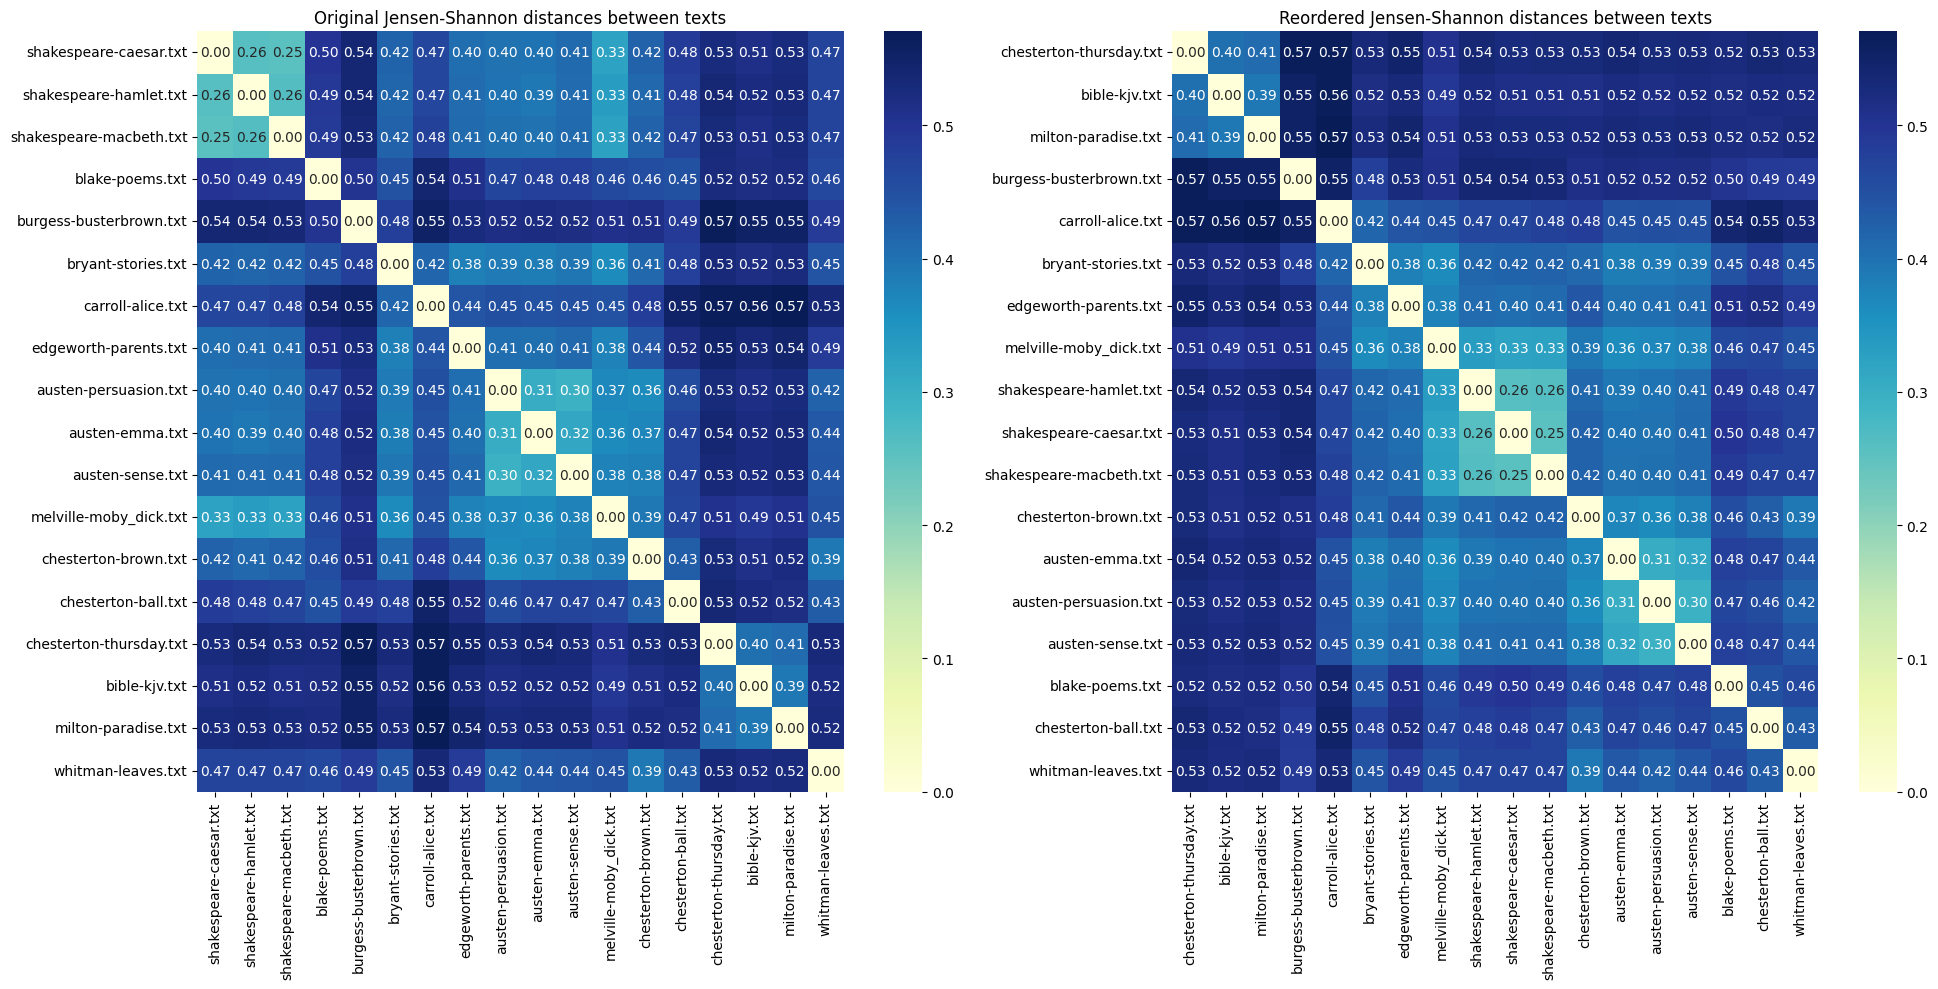

In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import jensenshannon, pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list, fcluster
from seaborn import heatmap
nltk.download('punkt')
nltk.download('gutenberg')
from nltk.corpus import gutenberg

all_tokens = set()
raw_texts = []
fileids = []  # To hold all file IDs for labels

for fileid in gutenberg.fileids():
    print(f"Processing text: {fileid}")
    raw_text = gutenberg.raw(fileid).lower()
    raw_texts.append(raw_text)
    fileids.append(fileid)  # Append file ID to list

    tokens = word_tokenize(raw_text)
    all_tokens.update(tokens)

# Initialize CountVectorizer with the all_tokens as the vocabulary
vectorizer = CountVectorizer(vocabulary=list(all_tokens))

# Transform raw_texts into count vectors
X = vectorizer.transform(raw_texts).toarray()

# Convert count vectors to probability vectors
P = X / X.sum(axis=1, keepdims=True)

print(P.shape)

# Initialize matrix for Jensen-Shannon distances
dist_matrix = np.zeros((len(raw_texts), len(raw_texts)))

# Compute pairwise Jensen-Shannon distances
for i in range(len(raw_texts)):
    for j in range(len(raw_texts)):
        dist_matrix[i, j] = jensenshannon(P[i], P[j])

# Perform hierarchical clustering and get new order of indices
link = linkage(squareform(dist_matrix), method='average')
new_order = leaves_list(link)


# Assigning cluster labels using `fcluster`
# Let's assume we want to cut the dendrogram to produce a specified number of clusters
max_d = number_of_clusters
cluster_labels = fcluster(link, max_d, criterion='maxclust')

# Mapping the file ids to their cluster labels
text_clusters = {gutenberg.fileids()[i]: cluster_label for i, cluster_label in enumerate(cluster_labels)}

print("\nClusters:")
for cluster_num in range(1, number_of_clusters + 1):  # Hierarchical clusters usually start at 1
    print(f"Cluster {cluster_num}:")
    for key, value in text_clusters.items():
        if value == cluster_num:
            print(f"   - {key}")


# Apply new order to distance matrix and labels
dist_matrix_new = dist_matrix[new_order, :][:, new_order]
fileids = np.array(fileids)[new_order]

# Plot heatmaps of distances
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

heatmap(dist_matrix, annot=True, fmt=".2f", cmap='YlGnBu', ax=axs[0])
axs[0].set_title('Original Jensen-Shannon distances between texts')
axs[0].set_xticklabels(fileids, rotation=90)
axs[0].set_yticklabels(fileids, rotation=0)

heatmap(dist_matrix_new, annot=True, fmt=".2f", cmap='YlGnBu', ax=axs[1])
axs[1].set_title('Reordered Jensen-Shannon distances between texts')
axs[1].set_xticklabels(fileids[new_order], rotation=90)
axs[1].set_yticklabels(fileids[new_order], rotation=0)

plt.tight_layout()
plt.show()
